# Pruebas de Hipótesis

## Objetivo

El objetivo de esta sección es **estudiar y comprender todos los tipos de pruebas de hipótesis estadísticas**, tanto paramétricas como no paramétricas. Para ello, abordaremos los fundamentos teóricos, los procedimientos paso a paso, y ejemplos prácticos que nos permitan aplicar correctamente este método inferencial en diferentes situaciones.

## Pasos fundamentales para realizar una prueba de hipótesis

A continuación se describen los **5 pasos esenciales** para realizar una prueba de hipótesis:

1. **Formular las hipótesis**:
   - Se establece la **hipótesis nula** (\(H_0\)), que generalmente representa una afirmación de igualdad, ausencia de efecto o el estado actual.
     > Ejemplo: \(H_0: \mu = 50\)
   - Se plantea la **hipótesis alternativa** (\(H_1\) o \(H_a\)), que corresponde a lo que se busca demostrar.
     > Ejemplo: \(H_1: \mu \neq 50\) (prueba bilateral), ó \(H_1: \mu > 50\) / \(H_1: \mu < 50\) (prueba unilateral).

2. **Elegir el nivel de significancia (\(\alpha\))**:
   - Se determina el riesgo que estamos dispuestos a asumir para cometer un **error tipo I** (rechazar \(H_0\) cuando en realidad es verdadera).
   - Usualmente se trabaja con \(\alpha = 0.05\), aunque también es común usar 0.01 o 0.10 según el contexto.

3. **Seleccionar la prueba estadística adecuada**:
   - Dependerá del tipo de datos (cuantitativos o cualitativos), tamaño de la muestra, y si se conoce o no la desviación estándar poblacional.
   - Algunas pruebas comunes incluyen:
     - Pruebas **paramétricas**: z, t, ANOVA
     - Pruebas **no paramétricas**: U de Mann-Whitney, Kruskal-Wallis, prueba de signos
     - Pruebas para proporciones o varianzas
     - Pruebas de bondad de ajuste y de independencia: \(χ^2\)

4. **Calcular el estadístico de prueba y el valor-p**:
   - Se utiliza la fórmula específica del test para calcular el **estadístico de prueba**.
   - A partir de este valor se obtiene el **valor-p**, que indica la probabilidad de observar un resultado igual o más extremo que el obtenido, bajo la suposición de que \(H_0\) es verdadera.

5. **Tomar una decisión**:
   - Comparamos el valor-p con el nivel de significancia \(\alpha\):
     - Si \( p \leq \alpha \): **rechazamos \(H_0\)** → existe evidencia suficiente para aceptar \(H_1\).
     - Si \( p > \alpha \): **no se rechaza \(H_0\)** → no hay suficiente evidencia para rechazarla.
     
---

## Próximos pasos

En las siguientes secciones estudiaremos los distintos tipos de pruebas por separado, clasificadas en función de:

1. Tipo de variable (categórica vs. numérica)
2. Número de muestras (una muestra, dos muestras, muestras relacionadas)
3. Conocimiento de parámetros poblacionales (varianzas, normalidad, etc.)
4. Supuestos de normalidad

Cada prueba se explicará con:
- Supuestos previos
- Ejemplo teórico
- Aplicación con código (Python / R)
- Interpretación de resultados


1. Pruebas de hipótesis para la media conociendo desviación estándar de la población

Ejemplo: El fabricante de neumáticos radiales con cinturón de acero X-15 para camiones señala que el millaje
medio que cada uno recorre antes de que se desgasten las cuerdas es de 60 000 millas. La desviación
estándar del millaje es de 5 000 millas. La Crosset Truck Company compró 48 neumáticos
y comprobó que el millaje medio para sus camiones es de 58000 millas. ¿La experiencia de
Crosset es diferente de lo que afirma el fabricante en el nivel de significancia de 0.05?


RESULTADOS DE LA PRUEBA DE HIPÓTESIS

Media poblacional esperada (μ₀): 60000
Media muestral (x̄): 58000
Desviación estándar poblacional (σ): 5000
Tamaño de muestra (n): 48
Nivel de significancia (α): 0.05

Estadístico Z calculado: -2.7713
Valor crítico (Zα/2): ±1.9600
Valor-p: 0.0056

Decisión: RECHAZAMOS la hipótesis nula.
Existe evidencia significativa de que la experiencia de Crosset es diferente a la del fabricante.


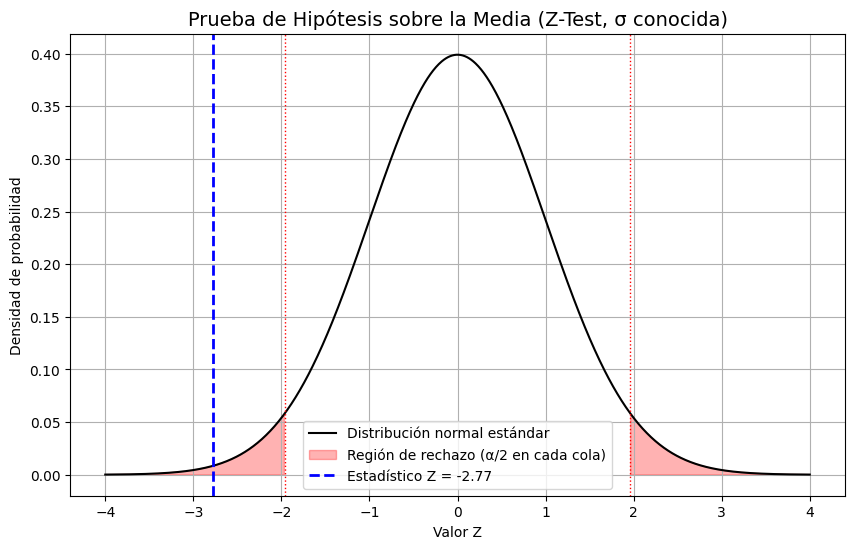

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ----------------------------
# Parámetros del problema
# ----------------------------
mu = 60000            # Media poblacional según el fabricante
sigma = 5000          # Desviación estándar poblacional
n = 48                # Tamaño de la muestra
x_bar = 58000         # Media muestral observada
alpha = 0.05          # Nivel de significancia

# ----------------------------
# Cálculo del estadístico Z
# ----------------------------
z = (x_bar - mu) / (sigma / np.sqrt(n))

# ----------------------------
# Cálculo de valores críticos y valor-p
# ----------------------------
z_critico = stats.norm.ppf(1 - alpha / 2)  # Prueba bilateral
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))  # Valor-p bilateral

# ----------------------------
# Resultados
# ----------------------------
print("RESULTADOS DE LA PRUEBA DE HIPÓTESIS\n")
print(f"Media poblacional esperada (μ₀): {mu}")
print(f"Media muestral (x̄): {x_bar}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Tamaño de muestra (n): {n}")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nEstadístico Z calculado: {z:.4f}")
print(f"Valor crítico (Zα/2): ±{z_critico:.4f}")
print(f"Valor-p: {p_valor:.4f}")

# ----------------------------
# Decisión
# ----------------------------
if abs(z) > z_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Existe evidencia significativa de que la experiencia de Crosset es diferente a la del fabricante.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para decir que la experiencia de Crosset es diferente a la del fabricante.")

# ----------------------------
# Visualización de la región de rechazo y estadístico
# ----------------------------
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = stats.norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, label='Distribución normal estándar', color='black')

# Región de rechazo
plt.fill_between(z_vals, 0, pdf_vals,
                 where=(z_vals <= -z_critico) | (z_vals >= z_critico),
                 color='red', alpha=0.3, label='Región de rechazo (α/2 en cada cola)')

# Estadístico Z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')

# Añadir líneas críticas
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=1)
plt.axvline(-z_critico, color='red', linestyle='dotted', linewidth=1)

# Estética del gráfico
plt.title("Prueba de Hipótesis sobre la Media (Z-Test, σ conocida)", fontsize=14)
plt.xlabel("Valor Z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()


La cadena de restaurantes MacBurger afirma que el tiempo de espera de los clientes es de 8 minutos con una desviación estándar poblacional de 1 minuto. El departamento de control de calidad halló en una muestra de 50 clientes en Warren Road MacBurger que el tiempo medio de espera era de 2.75 minutos. Con el nivel de significancia de 0.05, ¿puede concluir que el tiempo medio de espera sea menor a 3 minutos?

RESULTADOS DE LA PRUEBA DE HIPÓTESIS

Media poblacional bajo H₀ (μ₀): 3
Media muestral (x̄): 2.75
Desviación estándar poblacional (σ): 1
Tamaño de muestra (n): 50
Nivel de significancia (α): 0.05

Estadístico Z calculado: -1.7678
Valor crítico Z (α): -1.6449
Valor-p: 0.0385

Decisión: RECHAZAMOS la hipótesis nula.
Existe suficiente evidencia para decir que el tiempo medio de espera es menor a 3 minutos.


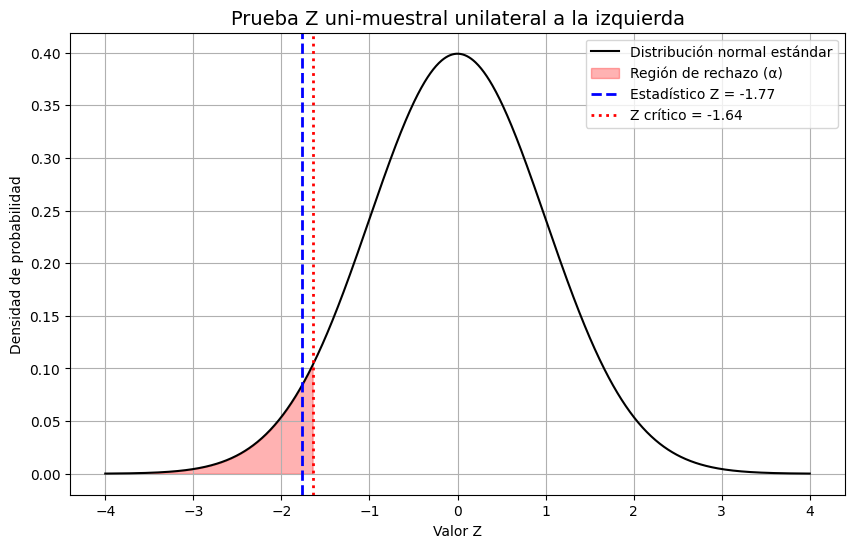

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ----------------------------
# Parámetros del problema
# ----------------------------
mu_0 = 3       # Media poblacional según la hipótesis nula
sigma = 1      # Desviación estándar poblacional (conocida)
n = 50         # Tamaño de la muestra
x_bar = 2.75   # Media muestral observada
alpha = 0.05   # Nivel de significancia

# ----------------------------
# Cálculo del estadístico Z
# ----------------------------
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# ----------------------------
# Cálculo del valor crítico y valor-p
# ----------------------------
z_critico = stats.norm.ppf(alpha)  # Prueba unilateral a la izquierda
p_valor = stats.norm.cdf(z)        # ÁREA a la izquierda de z

# ----------------------------
# Resultados
# ----------------------------
print("RESULTADOS DE LA PRUEBA DE HIPÓTESIS\n")
print(f"Media poblacional bajo H₀ (μ₀): {mu_0}")
print(f"Media muestral (x̄): {x_bar}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Tamaño de muestra (n): {n}")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nEstadístico Z calculado: {z:.4f}")
print(f"Valor crítico Z (α): {z_critico:.4f}")
print(f"Valor-p: {p_valor:.4f}")

# ----------------------------
# Decisión estadística
# ----------------------------
if z < z_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Existe suficiente evidencia para decir que el tiempo medio de espera es menor a 3 minutos.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar que el tiempo medio de espera es menor a 3 minutos.")

# ----------------------------
# Visualización de la región de rechazo y estadístico
# ----------------------------
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = stats.norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, label='Distribución normal estándar', color='black')

# Sombrear región de rechazo (prueba unilateral izquierda)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals < z_critico),
                 color='red', alpha=0.3, label='Región de rechazo (α)')

# Estadístico Z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')

# Línea de valor crítico
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Z crítico = {z_critico:.2f}')

plt.title("Prueba Z uni-muestral unilateral a la izquierda", fontsize=14)
plt.xlabel("Valor Z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()


En el momento en que fue contratada como mesera en el Grumney Family Restaurant, a Beth Brigden le dijeron: “Puedes ganar en promedio más de $\$80$ al día en propinas.” Suponga que la desviación estándar de la distribución de población es de $\$3.24.$ Los primeros 35 días de trabajar en el restaurante, la suma media de sus propinas fue de $\$84.85.$ Con el nivel de significancia de 0.01, ¿la señorita Brigden puede concluir que gana un promedio de más de $\$80$ en propinas?

RESULTADOS DE LA PRUEBA DE HIPÓTESIS

Media bajo H₀ (μ₀): 80
Media muestral (x̄): 84.85
Desviación estándar poblacional (σ): 3.24
Tamaño de la muestra (n): 35
Nivel de significancia (α): 0.01

Estadístico Z calculado: 8.8559
Valor crítico Z (α): 2.3263
Valor-p: 0.000000

Decisión: RECHAZAMOS la hipótesis nula.
Conclusión: Existe evidencia suficiente para afirmar que Beth gana en promedio más de $80 en propinas.


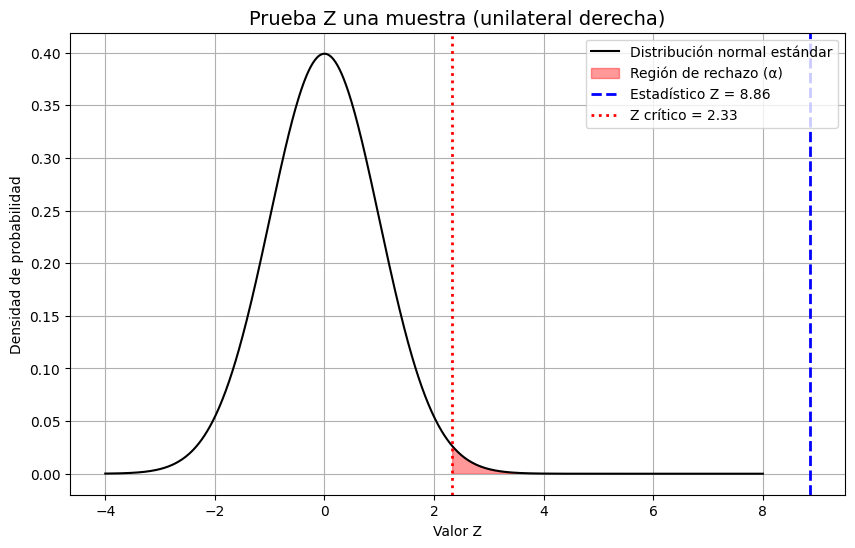

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ----------------------------
# Parámetros del problema
# ----------------------------
mu_0 = 80         # Media poblacional bajo H₀
sigma = 3.24      # Desviación estándar poblacional
n = 35            # Tamaño de la muestra
x_bar = 84.85     # Media muestral observada
alpha = 0.01      # Nivel de significancia

# ----------------------------
# Cálculo del estadístico Z
# ----------------------------
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# ----------------------------
# Cálculo del valor crítico y valor-p (prueba unilateral derecha)
# ----------------------------
z_critico = stats.norm.ppf(1 - alpha)
p_valor = 1 - stats.norm.cdf(z)

# ----------------------------
# Resultados en consola
# ----------------------------
print("RESULTADOS DE LA PRUEBA DE HIPÓTESIS\n")
print(f"Media bajo H₀ (μ₀): {mu_0}")
print(f"Media muestral (x̄): {x_bar}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Tamaño de la muestra (n): {n}")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nEstadístico Z calculado: {z:.4f}")
print(f"Valor crítico Z (α): {z_critico:.4f}")
print(f"Valor-p: {p_valor:.6f}")

# ----------------------------
# Decisión estadística
# ----------------------------
if z > z_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Conclusión: Existe evidencia suficiente para afirmar que Beth gana en promedio más de $80 en propinas.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("Conclusión: No hay suficiente evidencia para afirmar que Beth gana en promedio más de $80 en propinas.")

# ----------------------------
# Visualización de la región de rechazo y estadístico Z
# ----------------------------
z_vals = np.linspace(-4, 8, 1000)
pdf_vals = stats.norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución normal estándar')

# Sombrear la región de rechazo (únicamente a la derecha)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals > z_critico),
                 color='red', alpha=0.4, label='Región de rechazo (α)')

# Línea para el estadístico Z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')

# Línea de valor crítico
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Z crítico = {z_critico:.2f}')

# Estética
plt.title("Prueba Z una muestra (unilateral derecha)", fontsize=14)
plt.xlabel("Valor Z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()


Una máquina está diseñada para fabricar barras de aluminio con una longitud promedio de 43 cm. Para verificar si la máquina mantiene correctamente la longitud especificada, se tomó una muestra de 12 barras, obteniendo las siguientes mediciones (en cm): 42, 39, 42, 45, 43, 40, 39, 41, 40, 42, 43, 42.
¿Existe evidencia suficiente, con un nivel de significancia de 0,05, para afirmar que la media de las longitudes de las barras producidas es diferente a 43 cm?

RESULTADOS DE LA PRUEBA T DE UNA MUESTRA

Media muestral (x̄): 41.50
Desviación estándar muestral (s): 1.78
Tamaño de la muestra (n): 12
Media bajo H₀ (μ₀): 43
Nivel de significancia (α): 0.02

Estadístico t manual: -2.9130
Estadístico t scipy: -2.9130
Valor crítico t (α/2): ±2.7181
Valor-p (scipy, bilateral): 0.0141

Decisión: RECHAZAMOS la hipótesis nula.
Conclusión: Hay evidencia estadística de que la longitud media es diferente de 43.


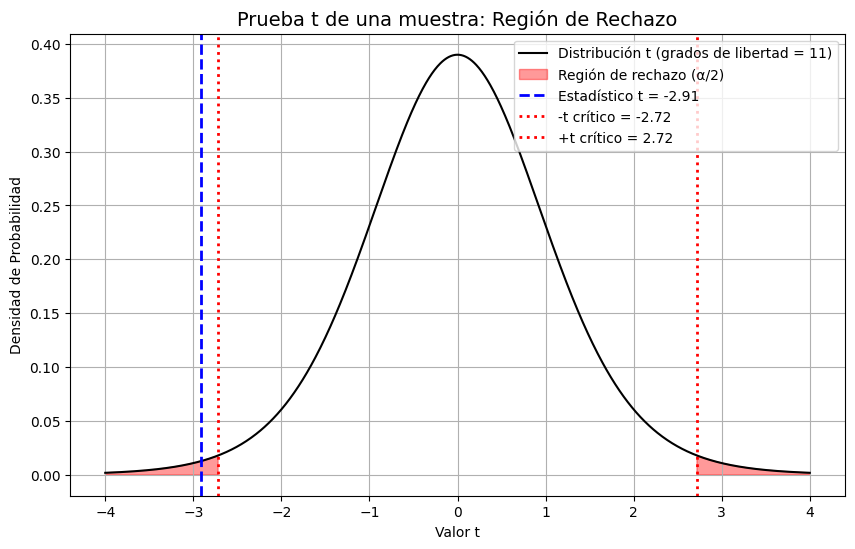

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# ----------------------------
# Datos y Parámetros del Problema
# ----------------------------
muestra = [42, 39, 42, 45, 43, 40, 39, 41, 40, 42, 43, 42]
mu_0 = 43           # Media poblacional según H₀
alpha = 0.02        # Nivel de significancia

# ----------------------------
# Estadísticos muestrales
# ----------------------------
n = len(muestra)
x_bar = np.mean(muestra)
s = np.std(muestra, ddof=1)

# ----------------------------
# Cálculo manual del estadístico t
# ----------------------------
t = (x_bar - mu_0) / (s / np.sqrt(n))

# ----------------------------
# Prueba t con scipy (verificación)
# ----------------------------
t_stat, p_valor = stats.ttest_1samp(muestra, mu_0)
# p-valor es dos colas; para comparación bilateral no hay que modificarlo

# Valor crítico para prueba bilateral
t_critico = stats.t.ppf(1 - alpha/2, df=n-1)

# ----------------------------
# Despliegue de resultados
# ----------------------------
print("RESULTADOS DE LA PRUEBA T DE UNA MUESTRA\n")
print(f"Media muestral (x̄): {x_bar:.2f}")
print(f"Desviación estándar muestral (s): {s:.2f}")
print(f"Tamaño de la muestra (n): {n}")
print(f"Media bajo H₀ (μ₀): {mu_0}")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nEstadístico t manual: {t:.4f}")
print(f"Estadístico t scipy: {t_stat:.4f}")
print(f"Valor crítico t (α/2): ±{t_critico:.4f}")
print(f"Valor-p (scipy, bilateral): {p_valor:.4f}")

# Decisión estadística (prueba bilateral)
if abs(t) > t_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Conclusión: Hay evidencia estadística de que la longitud media es diferente de 43.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para concluir que la longitud media ha cambiado.")

# ----------------------------
# Visualización de la región de rechazo y estadístico t
# ----------------------------
t_vals = np.linspace(-4, 4, 1000)
pdf_vals = stats.t.pdf(t_vals, df=n-1)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, pdf_vals, label=f"Distribución t (grados de libertad = {n-1})", color='black')

# Sombrear las regiones de rechazo
plt.fill_between(t_vals, 0, pdf_vals, where=(t_vals < -t_critico) | (t_vals > t_critico),
                 color='red', alpha=0.4, label='Región de rechazo (α/2)')

# Línea del estadístico t calculado
plt.axvline(t, color='blue', linestyle='--', linewidth=2, label=f'Estadístico t = {t:.2f}')

# Líneas de valores críticos
plt.axvline(-t_critico, color='red', linestyle='dotted', linewidth=2, label=f'-t crítico = {-t_critico:.2f}')
plt.axvline(t_critico, color='red', linestyle='dotted', linewidth=2, label=f'+t crítico = {t_critico:.2f}')

plt.title("Prueba t de una muestra: Región de Rechazo", fontsize=14)
plt.xlabel("Valor t")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(True)
plt.show()


# Pruebas de hipótesis con proporciones

**Objetivo:**  
Evaluar si la **proporción observada en una muestra** (\(\hat{p}\)) es significativamente distinta de una proporción teórica (\(p_0\)) especificada en la hipótesis nula. Las hipótesis pueden formularse para detectar diferencias en ambas direcciones (bilateral: \(H_1: p \neq p_0\)) o en una sola dirección (unilateral: \(H_1: p > p_0\) o \(H_1: p < p_0\)) [3][5][6].

---

**Hipótesis:**

- **Nula:** \(H_0: p = p_0\)
- **Alternativa:** Dependiendo del contexto,
  - **Bilateral**: \(H_1: p \neq p_0\)
  - **Unilateral derecha**: \(H_1: p > p_0\)
  - **Unilateral izquierda**: \(H_1: p < p_0\)

---

**Estadístico de prueba:**  
Para muestras grandes (\(n > 30\)), se utiliza la aproximación normal a la binomial para el cálculo del estadístico \(z\):

\[
z = \frac{\,\hat{p} - p_0\,}{\sqrt{\dfrac{p_0(1-p_0)}{n}}}
\]

donde:
- \(\hat{p} = \frac{x}{n}\) es la proporción muestral (\(x\): número de éxitos, \(n\): tamaño de muestra) [3][6],
- \(p_0\) es la proporción bajo la hipótesis nula,
- Se cumplen los supuestos de normalidad si \(n p_0\) y \(n(1-p_0)\) son mayores o iguales a 10.

---

**Procedimiento y decisión:**  
1. **Calcular \(z\)** con la fórmula anterior.
2. **Obtener el valor crítico** para el nivel de significancia (\(\alpha\)) correspondiente (una o dos colas).
3. **Comparar el estadístico \(z\)** con el valor crítico o calcular el **p-valor**.
   - Si el p-valor < \(\alpha\), **se rechaza \(H_0\)**.
   - Si el p-valor ≥ \(\alpha\), **no se rechaza \(H_0\)** [6][7].

---

> La interpretación de la prueba permite afirmar, con el nivel de confianza seleccionado, si la proporción de la población difiere o no de la proporción teórica considerada


Supongamos que queremos comprobar si la proporción de éxitos en una muestra es diferente a 0.5. En una muestra de 100 ensayos, se obtienen 60 éxitos (\( \hat{p} = 0.60 \)). 

Prueba Z para una proporción

Proporción muestral (p̂): 0.60
Estadístico z calculado : 2.0000
Valor crítico (α/2)     : ±1.9600
Valor-p (manual)        : 0.0455
Estadístico z (statsmodels): 2.0412 | Valor-p (statsmodels): 0.0412

Decisión: Rechazamos H₀. Hay evidencia de que la proporción difiere de 0.5.


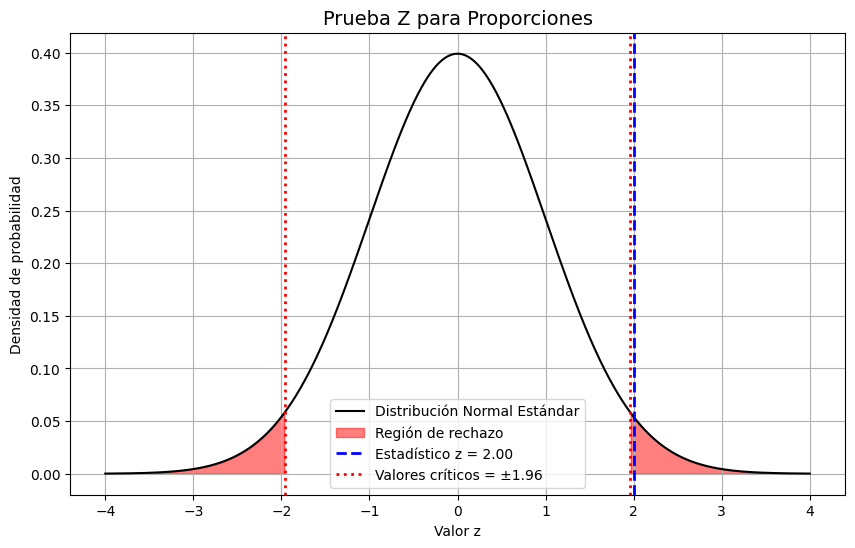

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

# Parámetros del problema
n = 100        # Tamaño de la muestra
x = 60         # Número de éxitos en la muestra
p0 = 0.5       # Proporción bajo H0
alpha = 0.05   # Nivel de significancia

# Proporción muestral
p_hat = x / n

# Cálculo del estadístico z manualmente
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Valores críticos para una prueba bilateral
z_critico = norm.ppf(1 - alpha/2)

# p-valor
p_valor = 2 * (1 - norm.cdf(abs(z)))

# Resultados con statsmodels (verificación)
stat, p_value_sm = proportions_ztest(count=x, nobs=n, value=p0, alternative='two-sided')

# Mostrar resultados
print("Prueba Z para una proporción\n")
print(f"Proporción muestral (p̂): {p_hat:.2f}")
print(f"Estadístico z calculado : {z:.4f}")
print(f"Valor crítico (α/2)     : ±{z_critico:.4f}")
print(f"Valor-p (manual)        : {p_valor:.4f}")
print(f"Estadístico z (statsmodels): {stat:.4f} | Valor-p (statsmodels): {p_value_sm:.4f}")

if abs(z) > z_critico:
    print("\nDecisión: Rechazamos H₀. Hay evidencia de que la proporción difiere de 0.5.")
else:
    print("\nDecisión: No se rechaza H₀. No hay evidencia suficiente para afirmar que la proporción difiere de 0.5.")

# Visualización de la región de rechazo
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10,6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución Normal Estándar')

# Sombrear regiones de rechazo (dos colas)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= -z_critico), color='red', alpha=0.5, label='Región de rechazo')
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals >=  z_critico), color='red', alpha=0.5)

# Línea del valor z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico z = {z:.2f}')

# Líneas de valores críticos
plt.axvline(-z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valores críticos = ±{z_critico:.2f}')
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2)

# Títulos y leyenda
plt.title('Prueba Z para Proporciones', fontsize=14)
plt.xlabel('Valor z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()



Se lanza una moneda 100 veces. La hipótesis es que la moneda es justa (proporción teórica \(p_0 = 0.5\)). En la muestra se obtienen 60 caras, por lo que la proporción observada es \( \hat{p} = 0.60 \).

Prueba Z para una proporción (¿Moneda justa?)

Proporción muestral (p̂): 0.60
Estadístico z (manual):    2.0000
Valor crítico z±:         ±1.9600
p-valor (manual):          0.0455
Estadístico z (statsmodels): 2.0412
p-valor (statsmodels):     0.0412

Conclusión: Rechazamos H₀. Hay evidencia de que la moneda NO es justa.


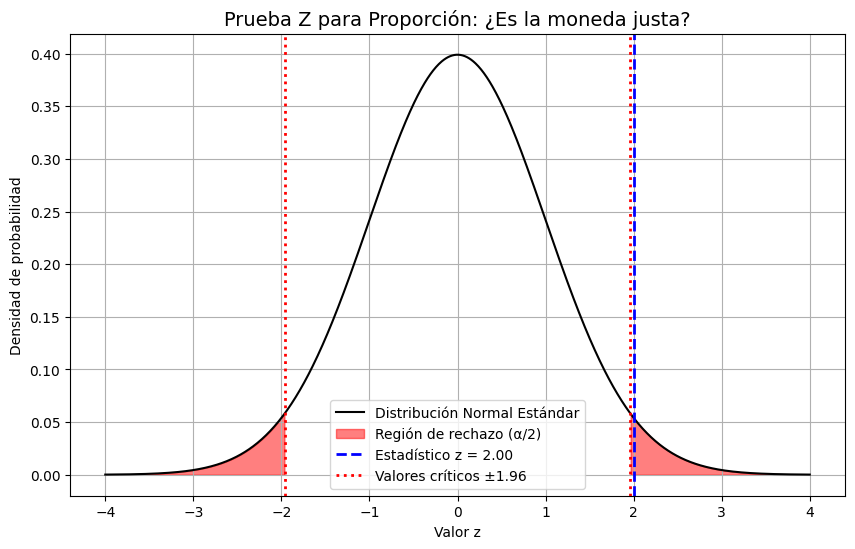

In [13]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del problema
n = 100      # lanzamientos
x = 60       # caras obtenidas
p0 = 0.5     # proporción teórica bajo H0 (moneda justa)
alpha = 0.05 # nivel de significancia

# Proporción muestral observada
p_hat = x / n

# Estadístico z manual
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Valores críticos para prueba bilateral
z_critico = norm.ppf(1 - alpha/2)

# Valor-p bilateral manual
p_valor = 2 * (1 - norm.cdf(abs(z)))

# Con statsmodels (para verificar)
stat, p_sm = proportions_ztest(count=x, nobs=n, value=p0, alternative='two-sided')

# Resultados
print("Prueba Z para una proporción (¿Moneda justa?)\n")
print(f"Proporción muestral (p̂): {p_hat:.2f}")
print(f"Estadístico z (manual):    {z:.4f}")
print(f"Valor crítico z±:         ±{z_critico:.4f}")
print(f"p-valor (manual):          {p_valor:.4f}")
print(f"Estadístico z (statsmodels): {stat:.4f}")
print(f"p-valor (statsmodels):     {p_sm:.4f}")

if abs(z) > z_critico:
    print("\nConclusión: Rechazamos H₀. Hay evidencia de que la moneda NO es justa.")
else:
    print("\nConclusión: No se rechaza H₀. No hay evidencia suficiente para decir que la moneda NO es justa.")

# Gráfica de la región de rechazo
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10,6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución Normal Estándar')

# Sombrear regiones de rechazo bilateral
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= -z_critico), color='red', alpha=0.5, label='Región de rechazo (α/2)')
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals >=  z_critico), color='red', alpha=0.5)

# Línea estadístico z
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico z = {z:.2f}')

# Líneas valores críticos
plt.axvline(-z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valores críticos ±{z_critico:.2f}')
plt.axvline(z_critico,  color='red', linestyle='dotted', linewidth=2)

plt.title('Prueba Z para Proporción: ¿Es la moneda justa?', fontsize=14)
plt.xlabel('Valor z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


Una empresa de salud afirma que la tasa de éxito de un nuevo tratamiento es del 70% (\(p_0 = 0.70\)). Se evalúa este tratamiento en 64 pacientes, obteniéndose 50 éxitos.

Prueba Z para proporción (Unilateral Derecha)
Proporción muestral (p̂):     0.7812
Estadístico z calculado:      1.4184
Valor crítico z (α = 0.05):   1.6449
Valor-p (manual):             0.0780
Valor-p (statsmodels):        0.0579

Decisión: No se rechaza H₀. No hay evidencia de que la tasa de éxito sea mayor al 70%.


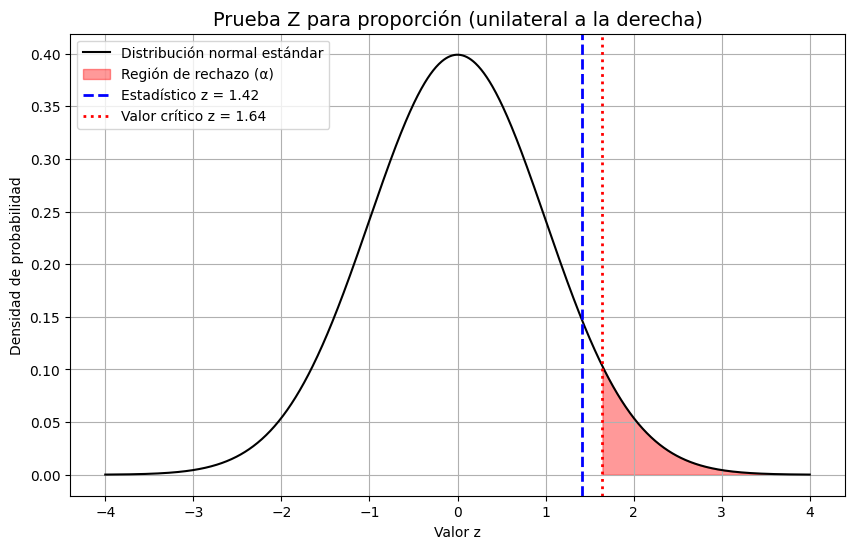

In [14]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
n = 64            # Número de observaciones
x = 50            # Éxitos
p0 = 0.70         # Proporción teórica bajo H₀
alpha = 0.05      # Nivel de significancia

# Proporción muestral
p_hat = x / n

# Estadístico z (manual)
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Valor crítico para prueba unilateral a la derecha
z_critico = norm.ppf(1 - alpha)

# Valor-p (unilateral derecha)
p_valor = 1 - norm.cdf(z)

# Verificación con statsmodels
stat, p_valor_sm = proportions_ztest(count=x, nobs=n, value=p0, alternative='larger')

# Resultados
print("Prueba Z para proporción (Unilateral Derecha)")
print(f"Proporción muestral (p̂):     {p_hat:.4f}")
print(f"Estadístico z calculado:      {z:.4f}")
print(f"Valor crítico z (α = 0.05):   {z_critico:.4f}")
print(f"Valor-p (manual):             {p_valor:.4f}")
print(f"Valor-p (statsmodels):        {p_valor_sm:.4f}")

# Decisión
if z > z_critico:
    print("\nDecisión: Rechazamos H₀. Hay evidencia de que la tasa de éxito es mayor al 70%.")
else:
    print("\nDecisión: No se rechaza H₀. No hay evidencia de que la tasa de éxito sea mayor al 70%.")

# =============================
# Visualización de la prueba Z
# =============================
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, label='Distribución normal estándar', color='black')

# Sombrear región de rechazo (cola derecha)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals >= z_critico), color='red', alpha=0.4, label="Región de rechazo (α)")

# Línea del est. z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico z = {z:.2f}')

# Línea del valor crítico
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valor crítico z = {z_critico:.2f}')

# Etiquetas y estética
plt.title("Prueba Z para proporción (unilateral a la derecha)", fontsize=14)
plt.xlabel("Valor z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()


En un proceso de reclutamiento se afirma que al menos el 80% de los candidatos cumplen con los requisitos (\(p_0 = 0.80\)). Se evalúa a 100 candidatos y 70 cumplen con los requisitos. Haz una prueba unilateral a izquierda.

Prueba Z para proporción (Unilateral Izquierda)
Proporción muestral (p̂):        0.7000
Estadístico z calculado:         -2.5000
Valor crítico z (α = 0.05):      -1.6449
Valor-p (calculado):             0.0062
Valor-p (statsmodels):           0.0145

Decisión: RECHAZAMOS H₀.
Conclusión: La proporción de candidatos que cumplen con los requisitos es MENOR al 80%.


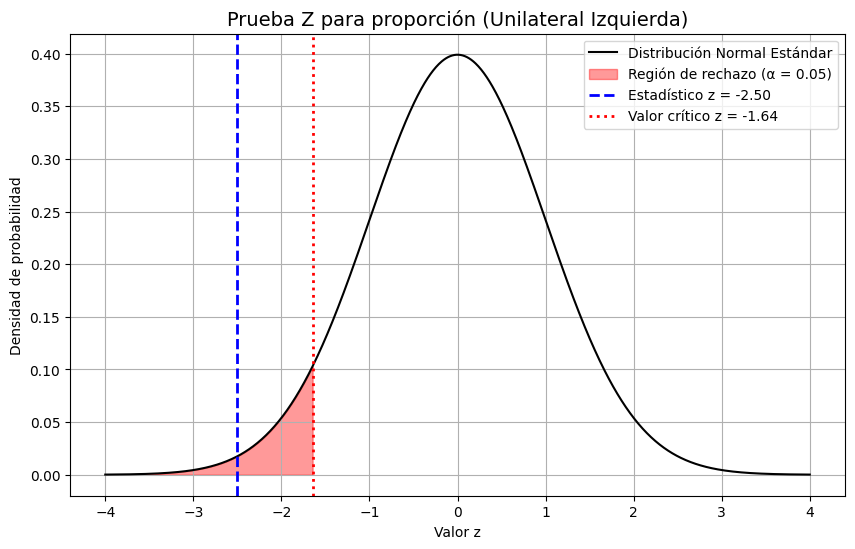

In [15]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del problema
n = 100          # Total de candidatos evaluados
x = 70           # Número de candidatos que cumplieron los requisitos
p0 = 0.80        # Proporción teórica bajo H0
alpha = 0.05     # Nivel de significancia

# Proporción muestral
p_hat = x / n

# Estadístico z calculado (manualmente)
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Valor crítico para prueba unilateral a la izquierda
z_critico = norm.ppf(alpha)

# Valor-p unilateral izquierda
p_valor = norm.cdf(z)

# Verificación con statsmodels
stat, p_valor_sm = proportions_ztest(count=x, nobs=n, value=p0, alternative='smaller')

# ---------------------
# Resultados numéricos
# ---------------------
print("Prueba Z para proporción (Unilateral Izquierda)")
print(f"Proporción muestral (p̂):        {p_hat:.4f}")
print(f"Estadístico z calculado:         {z:.4f}")
print(f"Valor crítico z (α = 0.05):      {z_critico:.4f}")
print(f"Valor-p (calculado):             {p_valor:.4f}")
print(f"Valor-p (statsmodels):           {p_valor_sm:.4f}")

# ---------------------
# Decisión estadística
# ---------------------
if z < z_critico:
    print("\nDecisión: RECHAZAMOS H₀.")
    print("Conclusión: La proporción de candidatos que cumplen con los requisitos es MENOR al 80%.")
else:
    print("\nDecisión: NO se rechaza H₀.")
    print("Conclusión: No hay evidencia suficiente para afirmar que la proporción es menor al 80%.")

# ---------------------
# Visualización gráfica
# ---------------------
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, label='Distribución Normal Estándar', color='black')

# Región de rechazo (izquierda)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= z_critico),
                 color='red', alpha=0.4, label='Región de rechazo (α = 0.05)')

# Línea del estadístico z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico z = {z:.2f}')

# Línea crítica
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valor crítico z = {z_critico:.2f}')

# Estética y título
plt.title('Prueba Z para proporción (Unilateral Izquierda)', fontsize=14)
plt.xlabel('Valor z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


# Pruebas de hipótesis con dos muestras

En este apartado encontrarás un resumen y ejemplos sobre **pruebas de hipótesis para dos muestras independientes, asumiendo desviaciones estándar poblacionales conocidas**.

---

## Resumen

En este tipo de pruebas se busca comparar las medias de dos poblaciones a partir de dos muestras independientes, suponiendo que se conocen las desviaciones estándar de ambas poblaciones ($\sigma_1$ y $\sigma_2$). El esquema general es:

- **Hipótesis nula:**  
  \[
  H_0: \mu_1 = \mu_2 \quad \text{(o de forma equivalente, } \mu_1 - \mu_2 = 0\text{)}
  \]

- **Hipótesis alternativa:**  
  Según el contexto, puede ser:
    - **Bilateral:**  
      \[
      H_1: \mu_1 \neq \mu_2
      \]
    - **Unilateral derecha:**  
      \[
      H_1: \mu_1 > \mu_2
      \]
    - **Unilateral izquierda:**  
      \[
      H_1: \mu_1 < \mu_2
      \]

El estadístico de prueba es:
\[
z = \frac{(\bar{x}_1 - \bar{x}_2) - \Delta_0}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}
\]
donde:

- $\bar{x}_1$, $\bar{x}_2$: medias muestrales,
- $n_1$, $n_2$: tamaños de muestra,
- $\Delta_0$: diferencia bajo $H_0$ (usualmente 0).

La decisión final se basa en comparar el valor absoluto de $z$ con el valor crítico de la distribución normal estándar (para pruebas bilaterales), o en confirmar la dirección (para pruebas unilaterales). También es válido calcular el p-valor correspondiente según el tipo de prueba.


Para comparar el rendimiento académico promedio de dos grupos de estudiantes, se dispone de la siguiente información: el primer grupo presenta una media muestral de 102, con un tamaño de muestra de 50 estudiantes y una desviación estándar poblacional de 10. Por su parte, el segundo grupo tiene una media muestral de 100, un tamaño de muestra de 60 estudiantes y una desviación estándar poblacional de 8. El objetivo consiste en determinar, mediante una prueba de hipótesis, si existe una diferencia significativa entre las medias de ambos grupos. Para ello se plantea como hipótesis nula que las medias poblacionales son iguales ($H_0: \mu_1 = \mu_2$) y como hipótesis alternativa que las medias son diferentes ($H_1: \mu_1 \neq \mu_2$)

Prueba Z para dos medias (muestras independientes, varianzas conocidas)

Estadístico z calculado:    1.1421
Valor crítico bilateral:   ±1.9600
Valor-p:                    0.2534

Conclusión: No se rechaza H₀. No hay evidencia estadística de diferencia en las medias poblacionales.


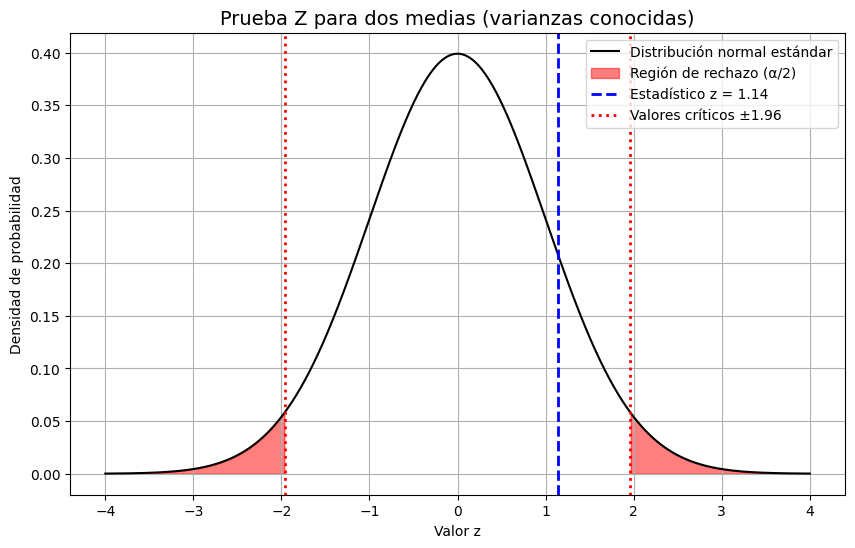

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de los grupos
mu1_muestra = 102
n1 = 50
sigma1 = 10

mu2_muestra = 100
n2 = 60
sigma2 = 8

alpha = 0.05  # Nivel de significancia

# Estadístico Z para dos medias (varianzas conocidas)
z = (mu1_muestra - mu2_muestra) / np.sqrt((sigma1**2 / n1) + (sigma2**2 / n2))

# Valores críticos para prueba bilateral
z_critico = norm.ppf(1 - alpha / 2)

# Valor p bilateral
p_valor = 2 * (1 - norm.cdf(abs(z)))

print("Prueba Z para dos medias (muestras independientes, varianzas conocidas)\n")
print(f"Estadístico z calculado:    {z:.4f}")
print(f"Valor crítico bilateral:   ±{z_critico:.4f}")
print(f"Valor-p:                    {p_valor:.4f}")

if abs(z) > z_critico:
    print("\nConclusión: Rechazamos H₀. Existe evidencia significativa de que las medias poblacionales son diferentes.")
else:
    print("\nConclusión: No se rechaza H₀. No hay evidencia estadística de diferencia en las medias poblacionales.")

# Visualización
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10,6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución normal estándar')

# Sombrear regiones de rechazo (dos colas)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= -z_critico), color='red', alpha=0.5, label='Región de rechazo (α/2)')
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals >=  z_critico), color='red', alpha=0.5)

# Línea del valor z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico z = {z:.2f}')

# Líneas de valores críticos
plt.axvline(-z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valores críticos ±{z_critico:.2f}')
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2)

plt.title('Prueba Z para dos medias (varianzas conocidas)', fontsize=14)
plt.xlabel('Valor z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


Se desea evaluar si un nuevo método de enseñanza mejora el rendimiento académico en comparación con el método tradicional. Para ello, se recolectaron datos de dos grupos: el grupo que utilizó el método nuevo obtuvo una media muestral de 105, con un tamaño de muestra de 40 estudiantes y una desviación estándar poblacional de 12; mientras que el grupo que usó el método tradicional tuvo una media de 100, con 35 estudiantes y la misma desviación estándar poblacional de 12. El objetivo es determinar si el nuevo método produce un rendimiento significativamente mayor, planteándose como hipótesis nula que las medias son iguales ($$H_0: \mu_1 = \mu_2$$) y como hipótesis alternativa que la media del grupo con el nuevo método es mayor que la del grupo tradicional ($$H_1: \mu_1 > \mu_2$$).

Prueba Z para dos medias (varianzas conocidas, prueba unilateral derecha)

Estadístico Z calculado: 1.8002
Valor crítico Z (α = 0.05): 1.6449
Valor-p: 0.0359

Decisión: RECHAZAMOS la hipótesis nula.
Conclusión: El nuevo método mejora significativamente el rendimiento académico.


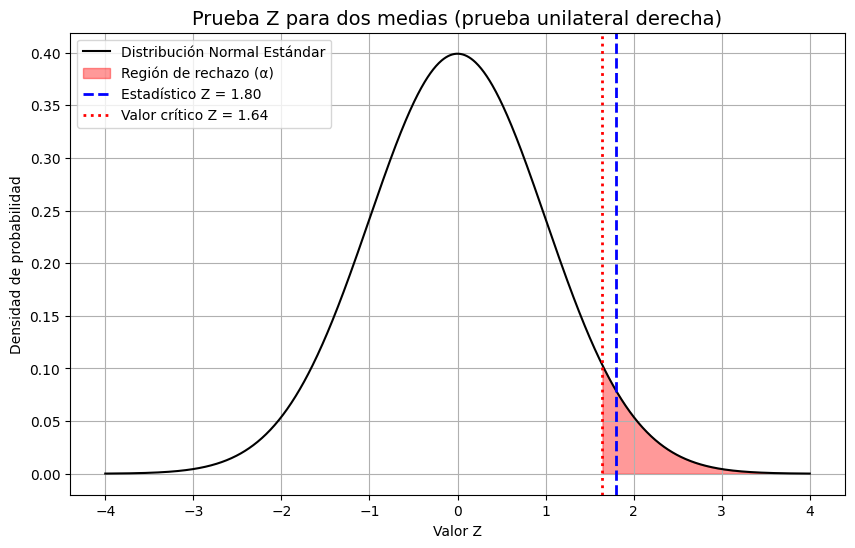

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del problema
mu1_muestra = 105    # Media del grupo nuevo método
n1 = 40              # Tamaño muestra grupo nuevo método
sigma1 = 12          # Desviación estándar poblacional grupo nuevo (conocida)

mu2_muestra = 100    # Media grupo método tradicional
n2 = 35              # Tamaño muestra grupo tradicional
sigma2 = 12          # Desviación estándar poblacional grupo tradicional (conocida)

alpha = 0.05         # Nivel de significancia (prueba unilateral derecha)

# Cálculo estadístico Z para dos muestras independientes con varianzas conocidas
z = (mu1_muestra - mu2_muestra) / np.sqrt((sigma1**2 / n1) + (sigma2**2 / n2))

# Valor crítico para prueba unilateral derecha
z_critico = norm.ppf(1 - alpha)

# Cálculo del valor-p unilateral derecha
p_valor = 1 - norm.cdf(z)

# Resultados
print("Prueba Z para dos medias (varianzas conocidas, prueba unilateral derecha)\n")
print(f"Estadístico Z calculado: {z:.4f}")
print(f"Valor crítico Z (α = 0.05): {z_critico:.4f}")
print(f"Valor-p: {p_valor:.4f}")

if z > z_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Conclusión: El nuevo método mejora significativamente el rendimiento académico.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para afirmar que el nuevo método mejora el rendimiento.")

# Visualización
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10,6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución Normal Estándar')

# Sombrear región de rechazo (cola derecha)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals >= z_critico), color='red', alpha=0.4, label='Región de rechazo (α)')

# Línea del estadístico Z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')

# Línea del valor crítico Z
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valor crítico Z = {z_critico:.2f}')

plt.title('Prueba Z para dos medias (prueba unilateral derecha)', fontsize=14)
plt.xlabel('Valor Z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


## Pruebas de proporciones de dos muestras

Esta prueba se utiliza para determinar si existe diferencia significativa entre las proporciones de éxito (o cualquier característica dicotómica) en dos poblaciones independientes. Se plantean:

- **Hipótesis nula:**  
  $$ H_0: p_1 = p_2 \quad \text{o, equivalentemente, } p_1 - p_2 = 0 $$

- **Hipótesis alternativa:**  
  Dependiendo del contexto:
  - **Bilateral:** $ H_1: p_1 \neq p_2 $
  - **Unilateral:** $ H_1: p_1 > p_2 $ u $ H_1: p_1 < p_2 $

El estadístico se calcula utilizando la proporción agrupada (pooled proportion):

$$
\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}
$$

donde $x_1$ y $x_2$ son los números de éxitos en cada muestra. El error estándar es:

$$
SE = \sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}
$$

y el estadístico de prueba es:

$$
z = \frac{\hat{p}_1 - \hat{p}_2}{SE} \quad \text{donde} \quad \hat{p}_1 = \frac{x_1}{n_1} \text{ y } \hat{p}_2 = \frac{x_2}{n_2}.
$$

La decisión se toma comparando el valor de $z$ con los valores críticos de la distribución normal (por ejemplo, ±1.96 para una prueba bilateral con \(\alpha = 0.05\)) o evaluando el p-valor según la hipótesis alternativa.

Se busca comparar la proporción de productos defectuosos entre dos líneas de producción. En la línea A, se detectaron 15 productos defectuosos de un total de 1000, lo que corresponde a una proporción de defectos de 0.015. Por su parte, en la línea B se encontraron 25 productos defectuosos en 1250 unidades, con una proporción de 0.02. El objetivo es determinar, mediante una prueba estadística, si existe una diferencia significativa entre las proporciones de defectos en ambas líneas. Para ello, se plantea como hipótesis nula que las proporciones son iguales ($$ H_0: p_1 = p_2 $$) y como hipótesis alternativa que las proporciones son diferentes ($$ H_1: p_1 \neq p_2 $$).

Proporción muestra A: 0.0150
Proporción muestra B: 0.0200
Estadístico Z: -0.8918
Valores críticos Z: -1.9600, 1.9600
Valor-p: 0.3725

Decisión: NO rechazamos la hipótesis nula.
Conclusión: No hay evidencia suficiente de diferencia en las proporciones.


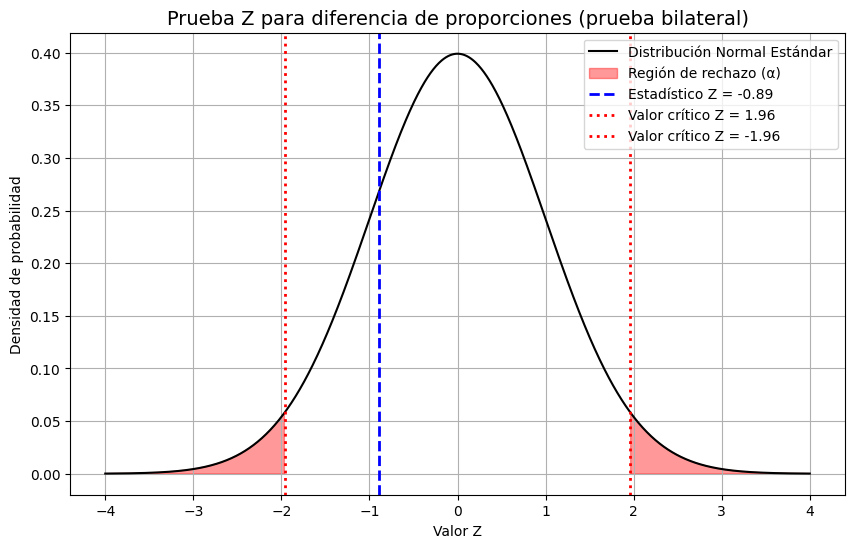

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos de las muestras
x1, n1 = 15, 1000     # Defectuosos y total (línea A)
x2, n2 = 25, 1250     # Defectuosos y total (línea B)

# Proporciones muestrales
p1 = x1 / n1
p2 = x2 / n2

# Proporción combinada bajo H0
p_comb = (x1 + x2) / (n1 + n2)

# Estadístico Z para dos proporciones
numerador = p1 - p2
denominador = np.sqrt(p_comb * (1 - p_comb) * (1/n1 + 1/n2))
z = numerador / denominador

# Prueba bilateral (dos colas)
alpha = 0.05
z_critico_pos = norm.ppf(1 - alpha/2)
z_critico_neg = norm.ppf(alpha/2)
p_valor = 2 * (1 - norm.cdf(abs(z)))

print(f"Proporción muestra A: {p1:.4f}")
print(f"Proporción muestra B: {p2:.4f}")
print(f"Estadístico Z: {z:.4f}")
print(f"Valores críticos Z: {z_critico_neg:.4f}, {z_critico_pos:.4f}")
print(f"Valor-p: {p_valor:.4f}")

if z < z_critico_neg or z > z_critico_pos:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Conclusión: Hay diferencia significativa en las proporciones de defectos.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente de diferencia en las proporciones.")



# Visualización de las regiones de rechazo
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)
plt.figure(figsize=(10,6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución Normal Estándar')
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= z_critico_neg) | (z_vals >= z_critico_pos), color='red', alpha=0.4, label='Región de rechazo (α)')
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')
plt.axvline(z_critico_pos, color='red', linestyle='dotted', linewidth=2, label=f'Valor crítico Z = {z_critico_pos:.2f}')
plt.axvline(z_critico_neg, color='red', linestyle='dotted', linewidth=2, label=f'Valor crítico Z = {z_critico_neg:.2f}')
plt.title('Prueba Z para diferencia de proporciones (prueba bilateral)', fontsize=14)
plt.xlabel('Valor Z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid()
plt.show()


Se está evaluando si un nuevo tratamiento (Grupo 1) mejora la tasa de éxito en comparación con un tratamiento estándar (Grupo 2). En el Grupo 1 se observaron 80 éxitos en 200 ensayos, lo que corresponde a una proporción de éxito de $$ p_1 = 0.40 $$, mientras que en el Grupo 2 se registraron 60 éxitos en 200 ensayos, con una proporción de éxito de $$ p_2 = 0.30 $$. Para determinar si la diferencia observada es estadísticamente significativa, se plantea la siguiente hipótesis nula y alternativa: $$ H_0: p_1 = p_2 $$, que indica que no hay diferencia entre las proporciones de éxito de ambos grupos, frente a la hipótesis alternativa $$ H_1: p_1 > p_2 $$, que propone que el nuevo tratamiento tiene una tasa de éxito mayor que la del tratamiento estándar.

Prueba Z para diferencia de proporciones (prueba unilateral derecha)

Proporción Grupo 1 (nuevo): 0.4000
Proporción Grupo 2 (estándar): 0.3000
Estadístico Z: 2.0966
Valor crítico Z (α = 0.05): 1.6449
Valor-p: 0.0180

Decisión: RECHAZAMOS la hipótesis nula.
Conclusión: El nuevo tratamiento mejora la tasa de éxito de forma significativa.


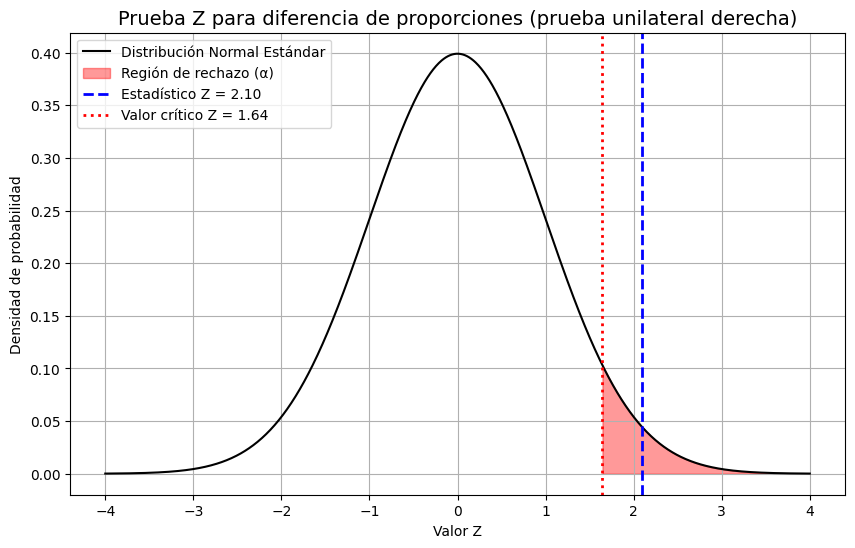

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos del problema
x1, n1 = 80, 200  # Éxitos y tamaño muestral del Grupo 1 (nuevo tratamiento)
x2, n2 = 60, 200  # Éxitos y tamaño muestral del Grupo 2 (tratamiento estándar)

# Proporciones muestrales
p1 = x1 / n1
p2 = x2 / n2

# Proporción combinada bajo H0
p_comb = (x1 + x2) / (n1 + n2)

# Estadístico Z
numerador = p1 - p2
denominador = np.sqrt(p_comb * (1 - p_comb) * (1/n1 + 1/n2))
z = numerador / denominador

# Nivel de significancia para prueba unilateral derecha
alpha = 0.05
z_critico = norm.ppf(1 - alpha)

# Valor-p unilateral derecha
p_valor = 1 - norm.cdf(z)

# Resultados
print("Prueba Z para diferencia de proporciones (prueba unilateral derecha)\n")
print(f"Proporción Grupo 1 (nuevo): {p1:.4f}")
print(f"Proporción Grupo 2 (estándar): {p2:.4f}")
print(f"Estadístico Z: {z:.4f}")
print(f"Valor crítico Z (α = {alpha}): {z_critico:.4f}")
print(f"Valor-p: {p_valor:.4f}")

if z > z_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Conclusión: El nuevo tratamiento mejora la tasa de éxito de forma significativa.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para afirmar que el nuevo tratamiento mejora la tasa de éxito.")

# Visualización
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10,6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución Normal Estándar')

# Región de rechazo (cola derecha)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals >= z_critico), color='red', alpha=0.4, label='Región de rechazo (α)')

# Línea del estadístico Z
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valor crítico Z = {z_critico:.2f}')

plt.title('Prueba Z para diferencia de proporciones (prueba unilateral derecha)', fontsize=14)
plt.xlabel('Valor Z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


Se está investigando si un procedimiento tradicional (Grupo 1) presenta una tasa de éxito inferior en comparación con un nuevo procedimiento (Grupo 2). En el Grupo 1 se obtuvieron 30 éxitos en 150 ensayos, lo que da lugar a una proporción de éxito de $$ p_1 = 0.20 $$, mientras que en el Grupo 2 se registraron 45 éxitos en el mismo número de ensayos, con una proporción de éxito de $$ p_2 = 0.30 $$. Con el fin de determinar si el nuevo procedimiento supera significativamente al tradicional, se plantea la siguiente prueba de hipótesis:  
$$ H_0: p_1 = p_2 \quad \text{vs.} \quad H_1: p_1 < p_2 $$.  
La hipótesis nula ($$ H_0 $$) establece que no hay diferencia entre las tasas de éxito de ambos procedimientos, mientras que la hipótesis alternativa ($$ H_1 $$) sostiene que el procedimiento tradicional tiene una tasa de éxito menor que la del nuevo procedimiento.

Prueba Z para diferencia de proporciones (prueba unilateral izquierda)

Proporción Grupo 1 (tradicional): 0.2000
Proporción Grupo 2 (nuevo):       0.3000
Proporción combinada:             0.2500
Error estándar:                   0.0500
Estadístico Z:                    -2.0000
Valor crítico Z (α = 0.05):    -1.6449
Valor-p:                          0.0228

Decisión: RECHAZAMOS la hipótesis nula.
Conclusión: El nuevo procedimiento mejora significativamente la tasa de éxito.


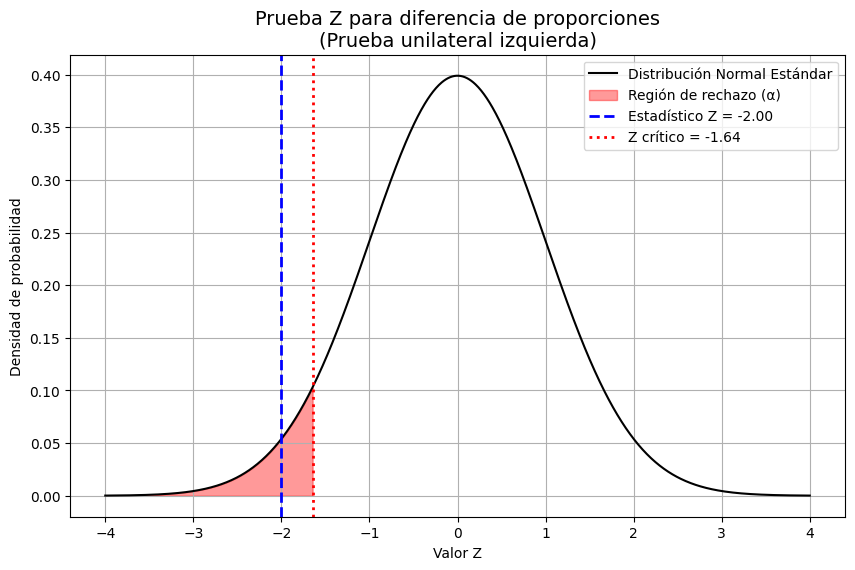

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos de ambos grupos
x1, n1 = 30, 150  # Grupo 1: procedimiento tradicional
x2, n2 = 45, 150  # Grupo 2: nuevo procedimiento

# Proporciones muestrales
p1 = x1 / n1
p2 = x2 / n2

# Proporción combinada bajo H0
p_comb = (x1 + x2) / (n1 + n2)

# Error estándar
SE = np.sqrt(p_comb * (1 - p_comb) * (1/n1 + 1/n2))

# Estadístico Z
z = (p1 - p2) / SE

# Nivel de significancia para prueba unilateral izquierda
alpha = 0.05
z_critico = norm.ppf(alpha)  # negativo, ya que es cola izquierda

# Valor-p
p_valor = norm.cdf(z)

# Resultados
print("Prueba Z para diferencia de proporciones (prueba unilateral izquierda)\n")
print(f"Proporción Grupo 1 (tradicional): {p1:.4f}")
print(f"Proporción Grupo 2 (nuevo):       {p2:.4f}")
print(f"Proporción combinada:             {p_comb:.4f}")
print(f"Error estándar:                   {SE:.4f}")
print(f"Estadístico Z:                    {z:.4f}")
print(f"Valor crítico Z (α = {alpha}):    {z_critico:.4f}")
print(f"Valor-p:                          {p_valor:.4f}")

# Decisión
if z < z_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Conclusión: El nuevo procedimiento mejora significativamente la tasa de éxito.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente de que el nuevo procedimiento sea mejor.")

# Visualización
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución Normal Estándar')

# Colorear región de rechazo (cola izquierda)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= z_critico), color='red', alpha=0.4, label='Región de rechazo (α)')

# Línea del valor z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')

# Línea del valor crítico
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Z crítico = {z_critico:.2f}')

plt.title('Prueba Z para diferencia de proporciones\n(Prueba unilateral izquierda)', fontsize=14)
plt.xlabel('Valor Z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


A continuación se expone un resumen académico sobre la **prueba t para muestras independientes bajo el supuesto de igualdad de varianzas**, aplicable cuando las desviaciones estándar poblacionales son desconocidas. Se presentan tres ejemplos ilustrativos: uno con contraste bilateral y dos con contraste unilateral, todos orientados a la comparación de medias de dos poblaciones. Cada ejemplo aborda el cálculo del estadístico t, la obtención del p-valor y la representación gráfica de las regiones de rechazo en la distribución t de Student.

## Resumen

Cuando se pretende comparar las medias de dos poblaciones independientes y se desconoce la desviación estándar poblacional, es apropiado aplicar la **prueba t de Student para muestras independientes bajo igualdad de varianzas** (prueba t conjunta o _pooled t-test_)[1][2][6]. En este contexto, las hipótesis que guían el contraste pueden formularse del siguiente modo:

- **Hipótesis nula:**
  $$
  H_0:\ \mu_1 = \mu_2\ \quad \text{o, equivalentemente,}\ \mu_1 - \mu_2 = 0
  $$
- **Hipótesis alternativa:**
  De acuerdo con el objetivo del estudio, se puede plantear:
  $$
  H_1:\ \mu_1 \neq \mu_2 \quad \text{(bilateral)},\quad H_1:\ \mu_1 > \mu_2\quad \text{o}\quad H_1:\ \mu_1 < \mu_2\quad \text{(unilaterales)}
  $$

La condición de **homogeneidad de varianzas** debe ser verificada previamente, usualmente mediante pruebas como Levene, Bartlett o F de Snedecor, aceptándose la igualdad de varianzas si el valor-p es mayor a 0.05[2][3][4][6]. 

La **desviación estándar conjunta** (o varianza combinada, $$s_p$$) se estima mediante:

$$
s_p = \sqrt{ \frac{(n_1 - 1) s_1^2 + (n_2 - 1) s_2^2}{n_1 + n_2 - 2} }
$$
donde $$ n_1, n_2 $$ son los tamaños muestrales y $$ s_1^2, s_2^2 $$ las varianzas muestrales de cada grupo[1][2][6][7].

El **estadístico t** se calcula como:

$$
t = \frac{ \overline{x}_1 - \overline{x}_2 }{ s_p \sqrt{ \frac{1}{n_1} + \frac{1}{n_2} } }
$$

El número de **grados de libertad** es $$ \nu = n_1 + n_2 - 2 $$[1][2][6]. La decisión estadística se fundamenta en la comparación del estadístico t calculado con los valores críticos de la distribución t de Student según el tipo de contraste. Es habitual calcular el **p-valor** asociado para interpretar la significancia estadística y, además, visualizar la región de rechazo en la distribución t, lo que facilita la comprensión del resultado inferencial[4][6].

[1] https://www.jmp.com/es/statistics-knowledge-portal/t-test/two-sample-t-test
[2] https://www.ugr.es/~fmocan/MATERIALES%20DOCTORADO/testt2016.pdf
[3] https://datatab.es/tutorial/unpaired-t-test
[4] https://evidenciasenpediatria.es/articulo/7699/comparacion-de-dos-medias-pruebas-de-la-t-de-student
[5] https://editorial.risei.org/index.php/risei/catalog/download/convergencias-divergencias-investigacion-edicion1/29/646?inline=1
[6] https://cienciadedatos.net/documentos/pystats10-t-test-python
[7] https://virtual.uptc.edu.co/ova/estadistica/docs/libros/tstudent.pdf
[8] https://www.ninjaexcel.com/formulas-y-funciones-de-excel/prueba-t/
[9] https://www.revistaseden.org/files/12-cap%2012.pdf
[10] https://rpubs.com/Joaquin_AR/218467

A continuación se presentan tres situaciones aplicadas que ilustran distintos escenarios donde es apropiado aplicar una **prueba t para muestras independientes con varianzas iguales**

**Ejemplo 1: Comparación bilateral entre promedios académicos**

Se desea evaluar si existe una diferencia significativa en el rendimiento promedio entre dos grupos de estudiantes que cursan la misma asignatura, pero pertenecen a distintas secciones. El Grupo 1 presenta un promedio muestral de $$ \bar{x}_1 = 80 $$ con una desviación estándar de $$ s_1 = 10 $$ y un tamaño muestral de $$ n_1 = 30 $$. El Grupo 2, por su parte, tiene una media de $$ \bar{x}_2 = 75 $$, una desviación estándar de $$ s_2 = 12 $$ y $$ n_2 = 35 $$ estudiantes. Dado que el objetivo es detectar una diferencia en cualquier dirección, se plantea un **contraste bilateral** con las siguientes hipótesis:

- Hipótesis nula: $$ H_0: \mu_1 = \mu_2 $$
- Hipótesis alternativa: $$ H_1: \mu_1 \neq \mu_2 $$

¿Por qué se dice que se las varianzas son iguales? Aplique la prueba t para muestras independientes bajo ese supuesto.

**Ejemplo 2: Mejora bajo un nuevo programa de entrenamiento (contraste unilateral a la derecha)**

En este caso, se investiga si un nuevo programa de entrenamiento físico (Grupo 1) tiene un efecto positivo sobre el rendimiento en comparación con un programa tradicional (Grupo 2). El Grupo 1 obtuvo una media de $$ \bar{x}_1 = 85 $$, con una desviación estándar de $$ s_1 = 14 $$ y un tamaño muestral de $$ n_1 = 25 $$. El Grupo 2 mostró un promedio de $$ \bar{x}_2 = 80 $$, un valor de $$ s_2 = 10 $$ y $$ n_2 = 20 $$ participantes. Como el interés está en demostrar una mejora, se trata de un **contraste unilateral a la derecha**, con hipótesis:

- Hipótesis nula: $$ H_0: \mu_1 = \mu_2 $$
- Hipótesis alternativa: $$ H_1: \mu_1 > \mu_2 $$

Se debe realizar una prueba t unilateral bajo el supuesto de igualdad de varianzas para contrastar si el nuevo programa es estadísticamente superior.

**Ejemplo 3: Evaluación de menor rendimiento en un grupo experimental (contraste unilateral a la izquierda)**

Aquí se evalúa si un grupo experimental (Grupo 1), expuesto a una nueva metodología, obtuvo un rendimiento inferior en comparación con un grupo de control (Grupo 2) que siguió el método tradicional. El Grupo 1 alcanzó un promedio de $$ \bar{x}_1 = 70 $$, con una desviación estándar de $$ s_1 = 11 $$ y un total de $$ n_1 = 40 $$ participantes. En cambio, el Grupo 2 logró una media de $$ \bar{x}_2 = 75 $$, con una desviación estándar de $$ s_2 = 13 $$ y $$ n_2 = 45 $$ sujetos. Debido a que se busca evidenciar un rendimiento menor en el Grupo 1, se plantea un **contraste unilateral a la izquierda**, con las siguientes hipótesis:

- Hipótesis nula: $$ H_0: \mu_1 = \mu_2 $$
- Hipótesis alternativa: $$ H_1: \mu_1 < \mu_2 $$

El análisis requiere aplicar una prueba t unilateral bajo el supuesto de igualdad de varianzas, verificando previamente dicha condición.

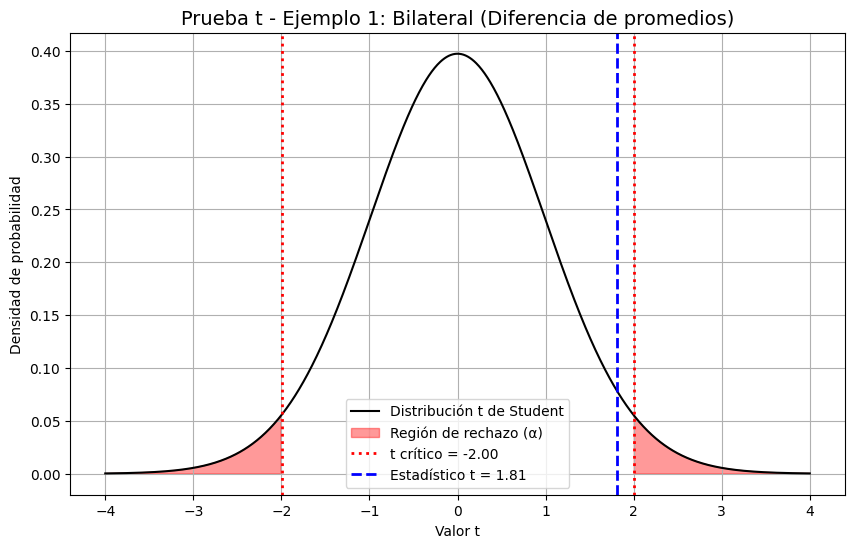

--- Resultados ---
Estadístico t: 1.8065
Grados de libertad: 63
Región crítica: t < -2.00 o t > 2.00
Valor-p: 0.0756
Decisión: NO rechazamos la hipótesis nula.


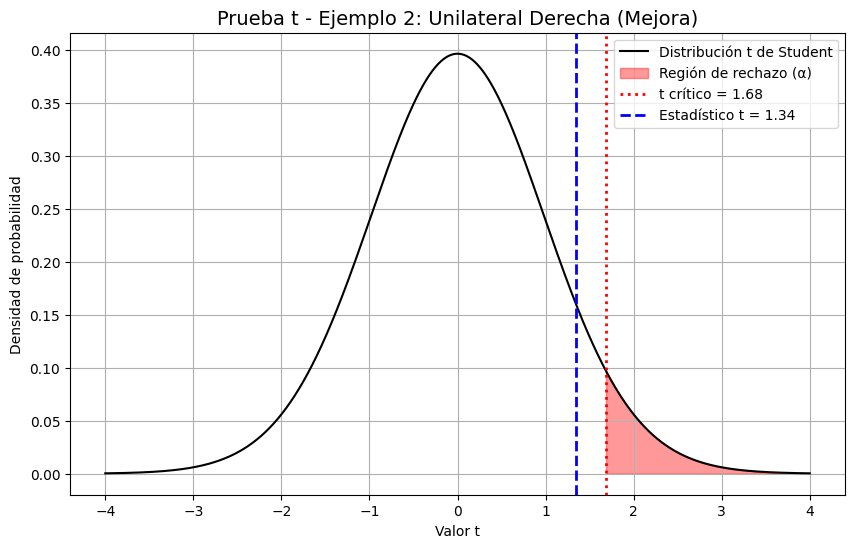

--- Resultados ---
Estadístico t: 1.3449
Grados de libertad: 43
Región crítica: t > 1.68
Valor-p: 0.0929
Decisión: NO rechazamos la hipótesis nula.


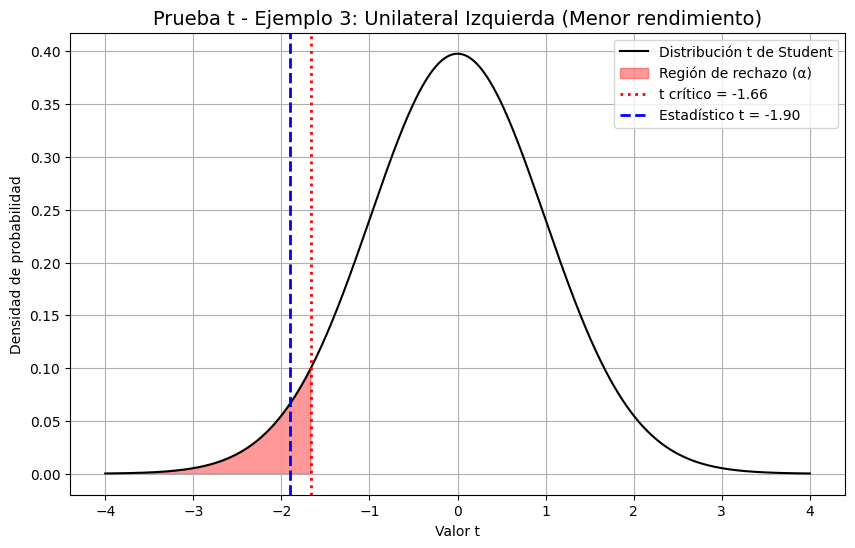

--- Resultados ---
Estadístico t: -1.9013
Grados de libertad: 83
Región crítica: t < -1.66
Valor-p: 0.0304
Decisión: RECHAZAMOS la hipótesis nula.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

def t_test_equal_variances_plot(x1, s1, n1, x2, s2, n2, alpha=0.05, alternative='two-sided', titulo=''):
    sp_squared = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
    sp = np.sqrt(sp_squared)
    t_stat = (x1 - x2) / (sp * np.sqrt(1/n1 + 1/n2))
    df = n1 + n2 - 2

    t_vals = np.linspace(-4, 4, 1000)
    pdf_vals = t.pdf(t_vals, df)
    plt.figure(figsize=(10,6))
    plt.plot(t_vals, pdf_vals, color='black', label='Distribución t de Student')
    
    if alternative == 'two-sided':
        t_crit_low = t.ppf(alpha/2, df)
        t_crit_high = t.ppf(1-alpha/2, df)
        # Sombrea ambas colas
        plt.fill_between(t_vals, 0, pdf_vals, where=(t_vals <= t_crit_low) | (t_vals >= t_crit_high), color='red', alpha=0.4, label='Región de rechazo (α)')
        plt.axvline(t_crit_low, color='red', linestyle='dotted', linewidth=2, label=f't crítico = {t_crit_low:.2f}')
        plt.axvline(t_crit_high, color='red', linestyle='dotted', linewidth=2)
        region = f"t < {t_crit_low:.2f} o t > {t_crit_high:.2f}"
    elif alternative == 'greater':
        t_crit = t.ppf(1-alpha, df)
        plt.fill_between(t_vals, 0, pdf_vals, where=(t_vals >= t_crit), color='red', alpha=0.4, label='Región de rechazo (α)')
        plt.axvline(t_crit, color='red', linestyle='dotted', linewidth=2, label=f't crítico = {t_crit:.2f}')
        region = f"t > {t_crit:.2f}"
    else: # 'less'
        t_crit = t.ppf(alpha, df)
        plt.fill_between(t_vals, 0, pdf_vals, where=(t_vals <= t_crit), color='red', alpha=0.4, label='Región de rechazo (α)')
        plt.axvline(t_crit, color='red', linestyle='dotted', linewidth=2, label=f't crítico = {t_crit:.2f}')
        region = f"t < {t_crit:.2f}"

    plt.axvline(t_stat, color='blue', linestyle='--', linewidth=2, label=f'Estadístico t = {t_stat:.2f}')
    plt.title(titulo, fontsize=14)
    plt.xlabel('Valor t')
    plt.ylabel('Densidad de probabilidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("--- Resultados ---")
    print(f'Estadístico t: {t_stat:.4f}')
    print(f'Grados de libertad: {df}')
    print(f'Región crítica: {region}')
    if alternative == 'two-sided':
        p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))
    elif alternative == 'greater':
        p_value = 1 - t.cdf(t_stat, df)
    else:
        p_value = t.cdf(t_stat, df)
    print(f'Valor-p: {p_value:.4f}')
    if (alternative == 'two-sided' and (t_stat < t_crit_low or t_stat > t_crit_high)) \
       or (alternative == 'greater' and t_stat > t_crit) \
       or (alternative == 'less' and t_stat < t_crit):
        print('Decisión: RECHAZAMOS la hipótesis nula.')
    else:
        print('Decisión: NO rechazamos la hipótesis nula.')

# -------------------------------
# Ejemplo 1: Bilateral
t_test_equal_variances_plot(
    x1=80, s1=10, n1=30,
    x2=75, s2=12, n2=35,
    alternative='two-sided',
    titulo='Prueba t - Ejemplo 1: Bilateral (Diferencia de promedios)'
)

# Ejemplo 2: Unilateral derecha
t_test_equal_variances_plot(
    x1=85, s1=14, n1=25,
    x2=80, s2=10, n2=20,
    alternative='greater',
    titulo='Prueba t - Ejemplo 2: Unilateral Derecha (Mejora)'
)

# Ejemplo 3: Unilateral izquierda
t_test_equal_variances_plot(
    x1=70, s1=11, n1=40,
    x2=75, s2=13, n2=45,
    alternative='less',
    titulo='Prueba t - Ejemplo 3: Unilateral Izquierda (Menor rendimiento)'
)


## Comparación de medias con varianzas desiguales: Prueba t de Welch

Cuando se desea comparar las medias de dos poblaciones a partir de muestras independientes, pero *no puede asumirse la igualdad de varianzas poblacionales* (heterocedasticidad), la herramienta estadística recomendada es la **prueba t de Welch**. Este método ofrece una alternativa robusta frente a la clásica prueba t conjunta, ya que adapta el cálculo de los grados de libertad según la variabilidad específica de cada grupo.

### Fundamentos teóricos

La hipótesis general que se contrasta es:

- **Hipótesis nula:** $$ H_0: \mu_1 = \mu_2 $$
- **Hipótesis alternativa:** Puede tomar forma bilateral ($$ \mu_1 \neq \mu_2 $$) o unilateral ($$ \mu_1 > \mu_2 $$ o $$ \mu_1  \mu_2 $$

En otra situación, se busca comprobar si el promedio del Grupo 1 es estadísticamente mayor que el del Grupo 2, bajo la premisa de varianzas desiguales. El Grupo 1 tiene media 105 ($$ \bar{x}_1 = 105 $$), desviación estándar de 18 ($$ s_1 = 18 $$) y tamaño muestral de 25 ($$ n_1 = 25 $$), mientras que el Grupo 2 presenta media de 95 ($$ \bar{x}_2 = 95 $$), desviación estándar de 22 ($$ s_2 = 22 $$) y 30 participantes ($$ n_2 = 30 $$). El enfoque analítico será el de un **contraste unilateral a la derecha**:

- Hipótesis nula: $$ H_0: \mu_1 = \mu_2 $$
- Hipótesis alternativa: $$ H_1: \mu_1 > \mu_2 $$

Se aplican los mismos pasos que en el ejemplo anterior, pero el área de rechazo en la gráfica de la distribución t se ubica en el extremo derecho, ya que solo interesa validar si el promedio de la primera población es superior.

### Ejemplo 3: Contraste unilateral a favor de $$ \mu_1 < \mu_2 $$

Finalmente, si el interés es verificar si el rendimiento del Grupo 1 es significativamente menor al del Grupo 2, y las varianzas son desiguales, se consideran los siguientes resultados: Grupo 1 con media 92 ($$ \bar{x}_1 = 92 $$), desviación estándar de 14 ($$ s_1 = 14 $$) y $$ n_1 = 28 $$; Grupo 2 con media 100 ($$ \bar{x}_2 = 100 $$), desviación estándar de 16 ($$ s_2 = 16 $$), y $$ n_2 = 32 $$. El contraste estadístico se formula de la siguiente manera:

- Hipótesis nula: $$ H_0: \mu_1 = \mu_2 $$
- Hipótesis alternativa: $$ H_1: \mu_1 < \mu_2 $$

Al ejecutar el cálculo t de Welch y su correspondiente estimación de grados de libertad, se observa la cola izquierda de la distribución t para delimitar la región de rechazo, evaluando si el Grupo 1 es, con significación estadística, inferior al Grupo 2.

### Reflexiones adicionales

- **Utilidad de la prueba t de Welch:** Resulta esencial cuando no se cumple el supuesto de igualdad de varianzas, ya que provee una comparación más ajustada y reduce el riesgo de error tipo I en presencia de heterocedasticidad.
- **Rol del p-valor y la representación gráfica:** El valor-p determina la evidencia en contra de la hipótesis nula; mientras que el gráfico de la distribución t —con las zonas de rechazo claramente marcadas— refuerza la interpretación, permitiendo distinguir fácilmente los escenarios de rechazo o aceptación de la hipótesis nula ante diferentes tipos de contraste.

Este enfoque integral no solo fortalece el rigor estadístico, sino también facilita la comunicación de resultados en contextos educativos, investigativos o profesionales.

Ejemplo 1: Contraste Bilateral
x̄1 = 100  | s1 = 15  | n1 = 30
x̄2 = 90  | s2 = 20  | n2 = 40
Estadístico t = 2.390457218668787
Grados de libertad = 67.99877300613497
P-valor = 0.01960288482446071


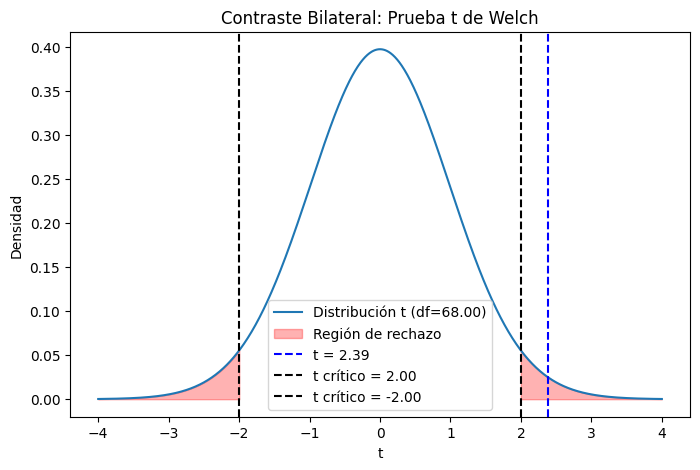

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Datos del ejemplo 1
xbar1, s1, n1 = 100, 15, 30
xbar2, s2, n2 = 90, 20, 40

# Cálculo del estadístico t
num = xbar1 - xbar2
denom = math.sqrt((s1**2/n1) + (s2**2/n2))
t_stat = num / denom

# Cálculo de los grados de libertad usando la fórmula de Welch-Satterthwaite
df = ((s1**2/n1 + s2**2/n2)**2) / (((s1**2/n1)**2)/(n1-1) + ((s2**2/n2)**2)/(n2-1))

# p-valor para prueba bilateral
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print("Ejemplo 1: Contraste Bilateral")
print("x̄1 =", xbar1, " | s1 =", s1, " | n1 =", n1)
print("x̄2 =", xbar2, " | s2 =", s2, " | n2 =", n2)
print("Estadístico t =", t_stat)
print("Grados de libertad =", df)
print("P-valor =", p_value)

# Gráfica: distribución t con regiones de rechazo (prueba bilateral)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df)  # Valor crítico (dos colas)
x_vals = np.linspace(-4, 4, 1000)
y_vals = t.pdf(x_vals, df)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=f"Distribución t (df={df:.2f})")
plt.fill_between(x_vals, y_vals, where=(x_vals <= -t_crit), color='red', alpha=0.3,
                 label="Región de rechazo")
plt.fill_between(x_vals, y_vals, where=(x_vals >= t_crit), color='red', alpha=0.3)
plt.axvline(t_stat, color='blue', linestyle='--', label=f"t = {t_stat:.2f}")
plt.axvline(t_crit, color='black', linestyle='--', label=f"t crítico = {t_crit:.2f}")
plt.axvline(-t_crit, color='black', linestyle='--', label=f"t crítico = {-t_crit:.2f}")
plt.title("Contraste Bilateral: Prueba t de Welch")
plt.xlabel("t")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Ejemplo 2: Contraste Unilateral (H1: μ1 > μ2)
x̄1 = 105  | s1 = 18  | n1 = 25
x̄2 = 95  | s2 = 22  | n2 = 30
Estadístico t = 1.853972374534261
Grados de libertad = 52.98839243293777
P-valor = 0.034656409324945736


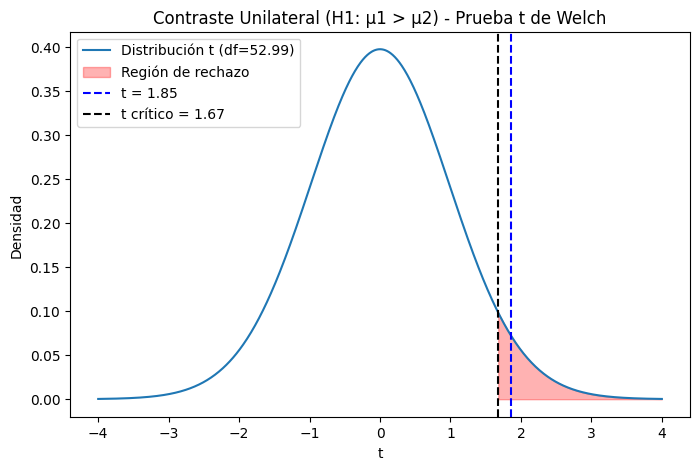

In [23]:
# Ejemplo 2: Contraste Unilateral (H1: μ1 > μ2)
# Datos del ejemplo 2
xbar1, s1, n1 = 105, 18, 25
xbar2, s2, n2 = 95, 22, 30

num = xbar1 - xbar2
denom = math.sqrt((s1**2/n1) + (s2**2/n2))
t_stat = num / denom

df = ((s1**2/n1 + s2**2/n2)**2) / (((s1**2/n1)**2)/(n1-1) + ((s2**2/n2)**2)/(n2-1))

# p-valor para prueba unilateral (cola derecha)
p_value = 1 - t.cdf(t_stat, df)

print("\nEjemplo 2: Contraste Unilateral (H1: μ1 > μ2)")
print("x̄1 =", xbar1, " | s1 =", s1, " | n1 =", n1)
print("x̄2 =", xbar2, " | s2 =", s2, " | n2 =", n2)
print("Estadístico t =", t_stat)
print("Grados de libertad =", df)
print("P-valor =", p_value)

# Gráfica: distribución t con región de rechazo unilateral (derecha)
alpha = 0.05
t_crit = t.ppf(1 - alpha, df)  # Valor crítico para cola derecha
x_vals = np.linspace(-4, 4, 1000)
y_vals = t.pdf(x_vals, df)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=f"Distribución t (df={df:.2f})")
plt.fill_between(x_vals, y_vals, where=(x_vals >= t_crit), color='red', alpha=0.3,
                 label="Región de rechazo")
plt.axvline(t_stat, color='blue', linestyle='--', label=f"t = {t_stat:.2f}")
plt.axvline(t_crit, color='black', linestyle='--', label=f"t crítico = {t_crit:.2f}")
plt.title("Contraste Unilateral (H1: μ1 > μ2) - Prueba t de Welch")
plt.xlabel("t")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Ejemplo 3: Contraste Unilateral (H1: μ1 < μ2)
x̄1 = 92  | s1 = 14  | n1 = 28
x̄2 = 100  | s2 = 16  | n2 = 32
Estadístico t = -2.065591117977289
Grados de libertad = 57.99969202340622
P-valor = 0.021672462274979893


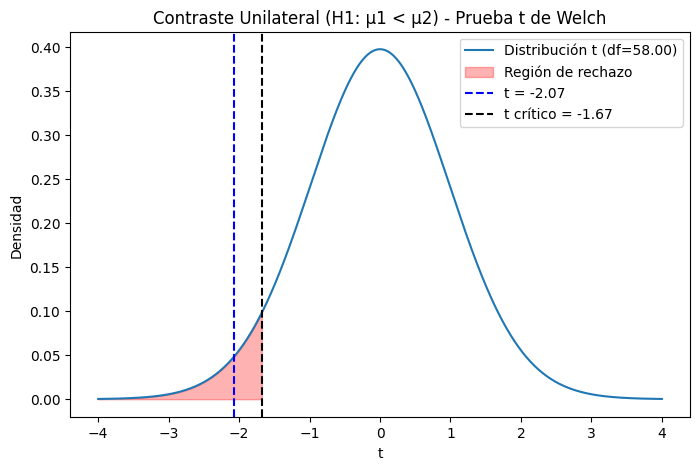

In [24]:
# Ejemplo 3: Contraste Unilateral (H1: μ1 < μ2)
# Datos del ejemplo 3
xbar1, s1, n1 = 92, 14, 28
xbar2, s2, n2 = 100, 16, 32

num = xbar1 - xbar2
denom = math.sqrt((s1**2/n1) + (s2**2/n2))
t_stat = num / denom

df = ((s1**2/n1 + s2**2/n2)**2) / (((s1**2/n1)**2)/(n1-1) + ((s2**2/n2)**2)/(n2-1))

# p-valor para prueba unilateral (cola izquierda)
p_value = t.cdf(t_stat, df)

print("\nEjemplo 3: Contraste Unilateral (H1: μ1 < μ2)")
print("x̄1 =", xbar1, " | s1 =", s1, " | n1 =", n1)
print("x̄2 =", xbar2, " | s2 =", s2, " | n2 =", n2)
print("Estadístico t =", t_stat)
print("Grados de libertad =", df)
print("P-valor =", p_value)

# Gráfica: distribución t con región de rechazo unilateral (izquierda)
alpha = 0.05
t_crit = t.ppf(alpha, df)  # Valor crítico para cola izquierda
x_vals = np.linspace(-4, 4, 1000)
y_vals = t.pdf(x_vals, df)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=f"Distribución t (df={df:.2f})")
plt.fill_between(x_vals, y_vals, where=(x_vals <= t_crit), color='red', alpha=0.3,
                 label="Región de rechazo")
plt.axvline(t_stat, color='blue', linestyle='--', label=f"t = {t_stat:.2f}")
plt.axvline(t_crit, color='black', linestyle='--', label=f"t crítico = {t_crit:.2f}")
plt.title("Contraste Unilateral (H1: μ1 < μ2) - Prueba t de Welch")
plt.xlabel("t")
plt.ylabel("Densidad")
plt.legend()
plt.show()

## Prueba de hipótesis para muestras dependientes (prueba de muestras pareadas)

La **prueba t de muestras pareadas** es un procedimiento estadístico diseñado para analizar si la diferencia promedio entre dos mediciones relacionadas es estadísticamente significativa. Suele aplicarse cuando cada observación de la primera muestra puede asociarse directamente con una observación de la segunda (por ejemplo, antes y después de un tratamiento en el mismo individuo, o dos condiciones evaluadas en los mismos sujetos). La comparación depende únicamente de las diferencias intrapares, lo que disminuye la variabilidad y aumenta la potencia de la prueba.

### Fundamentos teóricos

Suponga que de cada par se obtiene la diferencia $$ d_i $$ (por ejemplo, $$ d_i = x_{i,\text{post}} - x_{i,\text{pre}} $$). Los estadísticos principales son:

- **Media de las diferencias:**
  $$
  \bar{d} = \frac{1}{n} \sum_{i=1}^{n} d_i
  $$

- **Desviación estándar de las diferencias:**
  $$
  s_d = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(d_i-\bar{d})^2}
  $$

- **Estadístico t:**
  $$
  t = \frac{\bar{d} - \mu_0}{s_d/\sqrt{n}}
  $$
  donde normalmente $$ \mu_0 = 0 $$ (se busca si la diferencia media es igual a cero).

El estadístico t sigue una distribución t de Student con $$ n - 1 $$ grados de libertad. El resultado se interpreta comparando el valor observado con el valor crítico para el nivel de significancia deseado, o mediante el p-valor asociado.

Las hipótesis más frecuentes son:

- **Bilateral:** $$ H_0: \mu_d = 0 $$ frente a $$ H_1: \mu_d \neq 0 $$
- **Unilateral a la derecha:** $$ H_0: \mu_d = 0 $$ frente a $$ H_1: \mu_d > 0 $$
- **Unilateral a la izquierda:** $$ H_0: \mu_d = 0 $$ frente a $$ H_1: \mu_d  0 $$)

Suponga que se desea evaluar si un nuevo programa educativo eleva las calificaciones. Se consideran los puntajes antes y después para los mismos 10 estudiantes. El objetivo aquí es demostrar que, en promedio, las calificaciones después son mayores que antes; es decir, que la diferencia media (después – antes) es positiva. Se aplica el mismo cálculo que en el ejemplo anterior, pero enfocando la región de rechazo solo en valores positivos de t. Si el estadístico resulta significativamente alto y el p-valor es bajo en la cola derecha, se respalda la hipótesis de mejora.

### Ejemplo 3: Contraste unilateral a la izquierda ($$ H_1: \mu_d < 0 $$)

En este caso, se pretende identificar si un efecto negativo (por ejemplo, una intervención perjudicial o un factor estresor) provoca una disminución en una medida específica del mismo grupo evaluado en dos condiciones. Se calcula la diferencia para cada par ($$ d_i = $$ condición 2 – condición 1), esperando que, en promedio, sea negativa. Un resultado t considerablemente bajo (negativo) y un p-valor pequeño en la cola izquierda apoyarían la hipótesis de deterioro.

### Reflexiones adicionales

- **Ventaja de las pruebas pareadas:** La reducción de variabilidad interindividual asegura mayor sensibilidad, por lo que la prueba es especialmente recomendada en estudios de intervención, ensayos clínicos y experimentos con mediciones repetidas.
- **Fundamento para elegir el contraste:** La decisión entre contraste bilateral o unilateral debe basarse en la pregunta de investigación. Un contraste bilateral detecta cualquier diferencia, mientras que los unilaterales requieren una justificación basada en evidencia previa o hipótesis direccional clara.

Este enfoque sistemático permite analizar adecuadamente experimentos de medidas repetidas y cuantificar la evidencia estadística en favor o en contra de efectos observados.

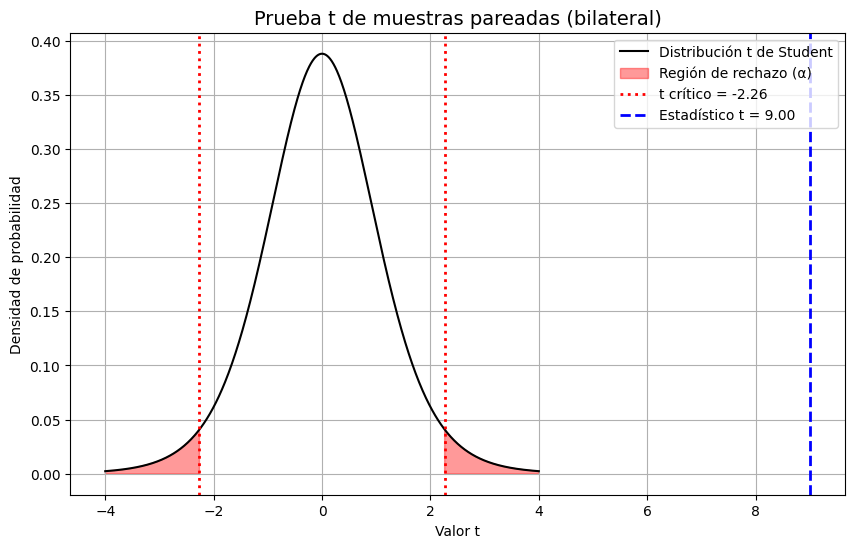

--- Resultados ---
Número de pares: 10
Media de las diferencias: 4.5000
Desviación estándar de las diferencias: 1.5811
Estadístico t: 9.0000
Grados de libertad: 9
Región crítica: t < -2.26 o t > 2.26
Valor-p: 0.0000
Decisión: RECHAZAMOS la hipótesis nula.


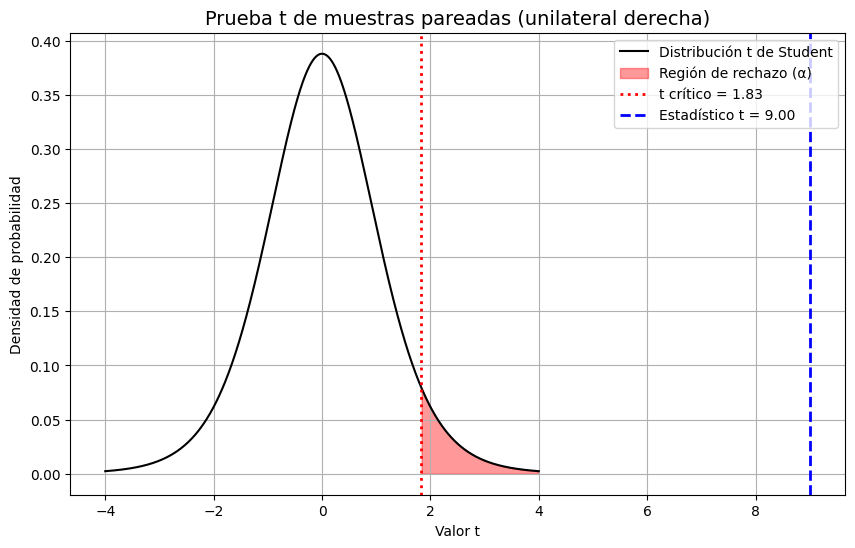

--- Resultados ---
Número de pares: 10
Media de las diferencias: 4.5000
Desviación estándar de las diferencias: 1.5811
Estadístico t: 9.0000
Grados de libertad: 9
Región crítica: t > 1.83
Valor-p: 0.0000
Decisión: RECHAZAMOS la hipótesis nula.


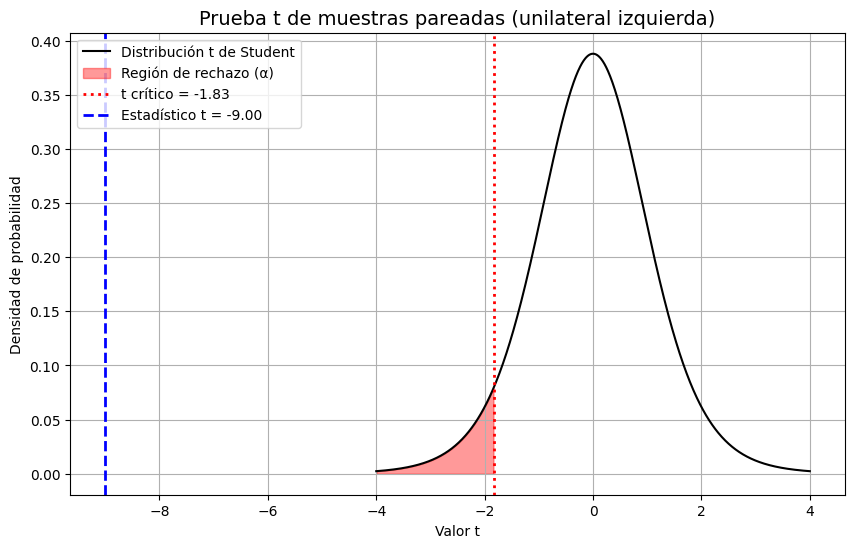

--- Resultados ---
Número de pares: 10
Media de las diferencias: -4.5000
Desviación estándar de las diferencias: 1.5811
Estadístico t: -9.0000
Grados de libertad: 9
Región crítica: t < -1.83
Valor-p: 0.0000
Decisión: RECHAZAMOS la hipótesis nula.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

def t_test_pareada_plot(diferencias, alpha=0.05, alternative='two-sided', titulo=''):
    n = len(diferencias)
    d_bar = np.mean(diferencias)
    s_d = np.std(diferencias, ddof=1)
    se = s_d / np.sqrt(n)

    t_stat = (d_bar - 0) / se
    df = n - 1

    t_vals = np.linspace(-4, 4, 1000)
    pdf_vals = t.pdf(t_vals, df)
    plt.figure(figsize=(10,6))
    plt.plot(t_vals, pdf_vals, color='black', label='Distribución t de Student')

    if alternative == 'two-sided':
        t_crit_low = t.ppf(alpha/2, df)
        t_crit_high = t.ppf(1 - alpha/2, df)
        plt.fill_between(t_vals, 0, pdf_vals,
                         where=(t_vals <= t_crit_low) | (t_vals >= t_crit_high),
                         color='red', alpha=0.4, label='Región de rechazo (α)')
        plt.axvline(t_crit_low, color='red', linestyle='dotted', linewidth=2,
                    label=f't crítico = {t_crit_low:.2f}')
        plt.axvline(t_crit_high, color='red', linestyle='dotted', linewidth=2)
        region = f"t < {t_crit_low:.2f} o t > {t_crit_high:.2f}"
    elif alternative == 'greater':
        t_crit = t.ppf(1 - alpha, df)
        plt.fill_between(t_vals, 0, pdf_vals, where=(t_vals >= t_crit),
                         color='red', alpha=0.4, label='Región de rechazo (α)')
        plt.axvline(t_crit, color='red', linestyle='dotted', linewidth=2,
                    label=f't crítico = {t_crit:.2f}')
        region = f"t > {t_crit:.2f}"
    else:  # 'less'
        t_crit = t.ppf(alpha, df)
        plt.fill_between(t_vals, 0, pdf_vals, where=(t_vals <= t_crit),
                         color='red', alpha=0.4, label='Región de rechazo (α)')
        plt.axvline(t_crit, color='red', linestyle='dotted', linewidth=2,
                    label=f't crítico = {t_crit:.2f}')
        region = f"t < {t_crit:.2f}"

    plt.axvline(t_stat, color='blue', linestyle='--', linewidth=2,
                label=f'Estadístico t = {t_stat:.2f}')
    plt.title(titulo, fontsize=14)
    plt.xlabel('Valor t')
    plt.ylabel('Densidad de probabilidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    print('--- Resultados ---')
    print(f'Número de pares: {n}')
    print(f'Media de las diferencias: {d_bar:.4f}')
    print(f'Desviación estándar de las diferencias: {s_d:.4f}')
    print(f'Estadístico t: {t_stat:.4f}')
    print(f'Grados de libertad: {df}')
    print(f'Región crítica: {region}')

    if alternative == 'two-sided':
        p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))
    elif alternative == 'greater':
        p_value = 1 - t.cdf(t_stat, df)
    else:
        p_value = t.cdf(t_stat, df)
    print(f'Valor-p: {p_value:.4f}')

    if (alternative == 'two-sided' and (t_stat < t_crit_low or t_stat > t_crit_high)) or \
       (alternative == 'greater' and t_stat > t_crit) or \
       (alternative == 'less' and t_stat < t_crit):
        print('Decisión: RECHAZAMOS la hipótesis nula.')
    else:
        print('Decisión: NO rechazamos la hipótesis nula.')


# -------------------------------
# Ejemplo de uso con datos ficticios
# Diferencias: (condición después - condición antes) para 10 sujetos
diferencias_ejemplo = np.array([2, 3, 5, 4, 3, 6, 5, 4, 6, 7])

# Ejemplo 1: prueba bilateral (diferencia en cualquier dirección)
t_test_pareada_plot(diferencias_ejemplo, alpha=0.05, alternative='two-sided',
                    titulo='Prueba t de muestras pareadas (bilateral)')

# Ejemplo 2: prueba unilateral a la derecha (mejora)
t_test_pareada_plot(diferencias_ejemplo, alpha=0.05, alternative='greater',
                    titulo='Prueba t de muestras pareadas (unilateral derecha)')

# Ejemplo 3: prueba unilateral a la izquierda (deterioro)
t_test_pareada_plot(-diferencias_ejemplo, alpha=0.05, alternative='less',
                    titulo='Prueba t de muestras pareadas (unilateral izquierda)')


Ejemplo 1: Contraste Bilateral
Media de las diferencias = -3.2
Desviación estándar = 1.3165611772087666
Estadístico t = -7.686151382644183
Grados de libertad = 9
P-valor = 3.043053437656873e-05


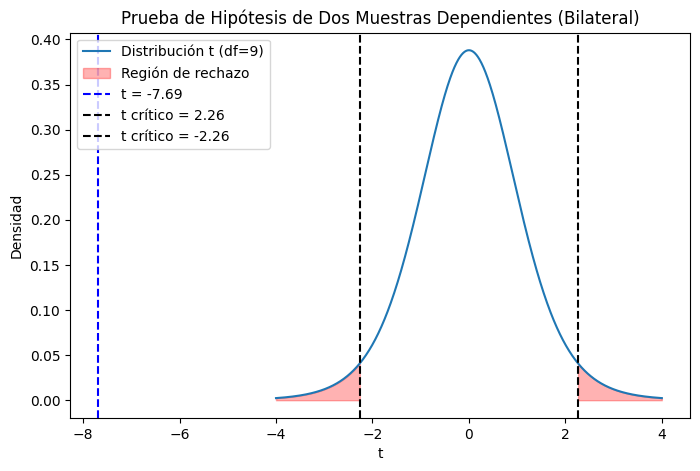

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t as t_dist

# Datos: valores medidos antes y después del tratamiento
antes    = np.array([150, 140, 135, 160, 145, 155, 148, 152, 149, 151])
despues  = np.array([145, 138, 133, 155, 142, 150, 146, 149, 147, 148])

# Cálculo de las diferencias
diferencias = despues - antes
n = len(diferencias)

# Cálculo de la media y la desviación estándar de las diferencias
d_bar = np.mean(diferencias)
s_d   = np.std(diferencias, ddof=1)  # ddof=1 para la muestra

# Estadístico t (hipótesis nula: μ₀ = 0)
t_stat = d_bar / (s_d / math.sqrt(n))
df = n - 1

# p-valor (prueba bilateral)
p_value = 2 * (1 - t_dist.cdf(np.abs(t_stat), df))

print("Ejemplo 1: Contraste Bilateral")
print("Media de las diferencias =", d_bar)
print("Desviación estándar =", s_d)
print("Estadístico t =", t_stat)
print("Grados de libertad =", df)
print("P-valor =", p_value)

# Visualización: distribución t y regiones de rechazo (α = 0.05)
alpha = 0.05
t_critical = t_dist.ppf(1 - alpha/2, df)  # Valor crítico para prueba bilateral

x_vals = np.linspace(-4, 4, 1000)
y_vals = t_dist.pdf(x_vals, df)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=f"Distribución t (df={df})")
plt.fill_between(x_vals, y_vals, where=(x_vals <= -t_critical), color='red', alpha=0.3, label="Región de rechazo")
plt.fill_between(x_vals, y_vals, where=(x_vals >= t_critical), color='red', alpha=0.3)
plt.axvline(t_stat, color='blue', linestyle='--', label=f"t = {t_stat:.2f}")
plt.axvline(t_critical, color='black', linestyle='--', label=f"t crítico = {t_critical:.2f}")
plt.axvline(-t_critical, color='black', linestyle='--', label=f"t crítico = {-t_critical:.2f}")
plt.title("Prueba de Hipótesis de Dos Muestras Dependientes (Bilateral)")
plt.xlabel("t")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Ejemplo 2: Contraste Unilateral (H1: μ_d > 0)
Media de las diferencias = 4.2
Desviación estándar = 1.1352924243950933
Estadístico t = 11.698806305154271
Grados de libertad = 9
P-valor = 4.779302583690637e-07


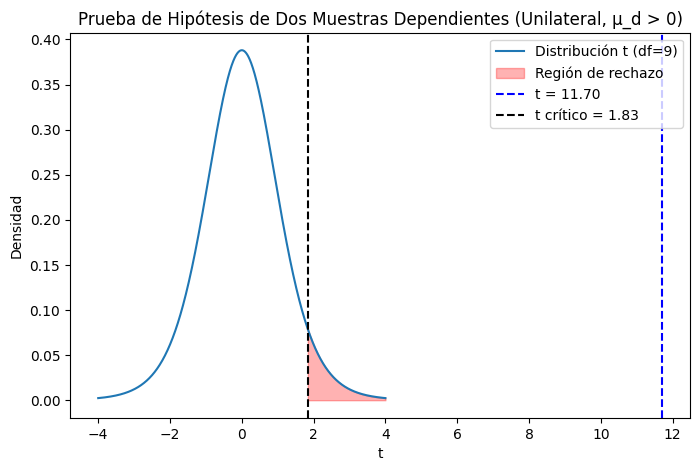

In [27]:
# Datos: calificaciones antes y después del programa
antes    = np.array([60, 65, 70, 68, 62, 66, 64, 69, 67, 65])
despues  = np.array([65, 70, 75, 72, 66, 72, 68, 73, 70, 67])

# Cálculo de las diferencias
diferencias = despues - antes
n = len(diferencias)

# Media y desviación estándar de las diferencias
d_bar = np.mean(diferencias)
s_d   = np.std(diferencias, ddof=1)

# Estadístico t (hipótesis nula: μ₀ = 0)
t_stat = d_bar / (s_d / math.sqrt(n))
df = n - 1

# p-valor para prueba unilateral (cola derecha)
p_value = 1 - t_dist.cdf(t_stat, df)

print("\nEjemplo 2: Contraste Unilateral (H1: μ_d > 0)")
print("Media de las diferencias =", d_bar)
print("Desviación estándar =", s_d)
print("Estadístico t =", t_stat)
print("Grados de libertad =", df)
print("P-valor =", p_value)

# Visualización: distribución t y región de rechazo (cola derecha, α = 0.05)
alpha = 0.05
t_critical = t_dist.ppf(1 - alpha, df)  # Valor crítico para cola derecha

x_vals = np.linspace(-4, 4, 1000)
y_vals = t_dist.pdf(x_vals, df)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=f"Distribución t (df={df})")
plt.fill_between(x_vals, y_vals, where=(x_vals >= t_critical), color='red', alpha=0.3, label="Región de rechazo")
plt.axvline(t_stat, color='blue', linestyle='--', label=f"t = {t_stat:.2f}")
plt.axvline(t_critical, color='black', linestyle='--', label=f"t crítico = {t_critical:.2f}")
plt.title("Prueba de Hipótesis de Dos Muestras Dependientes (Unilateral, μ_d > 0)")
plt.xlabel("t")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Ejemplo 3: Contraste Unilateral (H1: μ_d < 0)
Media de las diferencias = -2.3
Desviación estándar = 0.48304589153964794
Estadístico t = -15.057034426283474
Grados de libertad = 9
P-valor = 5.45760187841317e-08


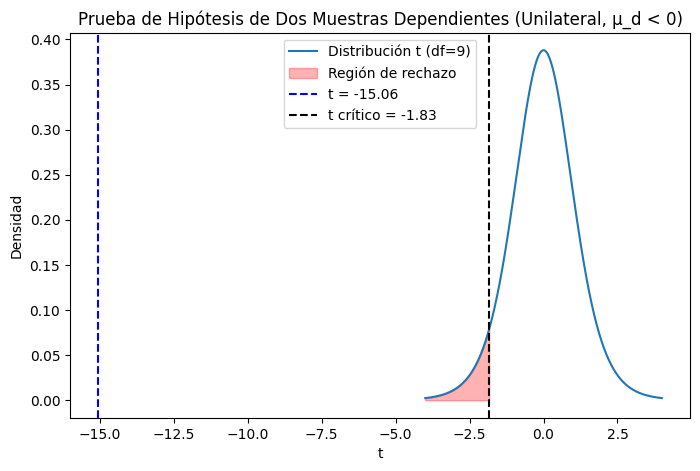

In [28]:
# Datos: mediciones en dos condiciones donde se espera una disminución
condicion1 = np.array([80, 85, 78, 82, 84, 80, 83, 81, 79, 82])
condicion2 = np.array([78, 83, 75, 80, 81, 78, 80, 79, 77, 80])

# Cálculo de las diferencias (condición2 - condición1)
diferencias = condicion2 - condicion1
n = len(diferencias)

# Media y desviación estándar de las diferencias
d_bar = np.mean(diferencias)
s_d   = np.std(diferencias, ddof=1)

# Estadístico t
t_stat = d_bar / (s_d / math.sqrt(n))
df = n - 1

# p-valor para prueba unilateral (cola izquierda)
p_value = t_dist.cdf(t_stat, df)

print("\nEjemplo 3: Contraste Unilateral (H1: μ_d < 0)")
print("Media de las diferencias =", d_bar)
print("Desviación estándar =", s_d)
print("Estadístico t =", t_stat)
print("Grados de libertad =", df)
print("P-valor =", p_value)

# Visualización: distribución t y región de rechazo (cola izquierda, α = 0.05)
alpha = 0.05
t_critical = t_dist.ppf(alpha, df)  # Valor crítico para cola izquierda

x_vals = np.linspace(-4, 4, 1000)
y_vals = t_dist.pdf(x_vals, df)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=f"Distribución t (df={df})")
plt.fill_between(x_vals, y_vals, where=(x_vals <= t_critical), color='red', alpha=0.3, label="Región de rechazo")
plt.axvline(t_stat, color='blue', linestyle='--', label=f"t = {t_stat:.2f}")
plt.axvline(t_critical, color='black', linestyle='--', label=f"t crítico = {t_critical:.2f}")
plt.title("Prueba de Hipótesis de Dos Muestras Dependientes (Unilateral, μ_d < 0)")
plt.xlabel("t")
plt.ylabel("Densidad")
plt.legend()
plt.show()